# Sequential Circuits

In digital design, it is important to distinguish between **combinational** and **sequential** logic. A combinational circuit produces outputs that depend only on the **current values** of its inputs. If we know the truth table or the Boolean equations describing the circuit, we can fully predict its behaviour at any instant. Nothing about the past matters, because the circuit has **no memory** of previous inputs.

Sequential logic behaves differently. Its outputs depend not only on the inputs that are present right now, but also on **inputs that occurred earlier**. In other words, a sequential circuit has **memory**. However, we do not necessarily mean that it remembers ***all*** the past inputs exactly as they occurred. Instead, a sequential circuit remembers only the information that is necessary to determine what it should do next. This essential information is what we call the **state** of the system: a collection of bits (called **state variables**) that summarizes everything about the past that is **relevant** for predicting the future behaviour of the circuit. Think of the state as the circuit **internal snapshot** of its history. It does **not** store the entire history; it stores only what matters. For example, a washing machine controller can be in phases like "wash", "rinse", "spin". Each phase determines what the system does and which phase comes next. The controller does not need to remember every button press or water-level measurement. It remembers only its current phase, its state.

Sequential logic is important because many real-world tasks require memory of past events. For example: counting events over time, coordinating the phases of a protocol or saving intermediate results while processing data. A **stateful system** can perform these tasks because the state acts as a structured memory of past events.

Because the behaviour of sequential circuits **evolves over time** and **depends on past events**, analysing them can be **significantly more challenging** than analysing combinational circuits. A powerful way to simplify this complexity is to **discipline ourselves** to design only **synchronous** sequential circuits. In a synchronous system, all memory elements update their state in a coordinated way controlled by a common signal, called the **clock**. This allows us to view the circuit as consisting of two well-defined parts:

- the **combinational logic**, that **computes the next values of the state**
- a bank of memory elements to store the current state and update it at each clock edge.

This disciplined structure makes it much easier to design, analyse, and verify sequential digital systems.

## Bistable Element

The simplest building block of memory in digital systems is a circuit that can rest in **two different stable configurations**. Such a circuit is called **bistable**. It can store one bit of information because each of its two stable states naturally corresponds to a logical 0 or a logical 1.The most fundamental example of a bistable circuit is formed by **two inverters connected in a loop**, also called **cross-coupled inverters**:

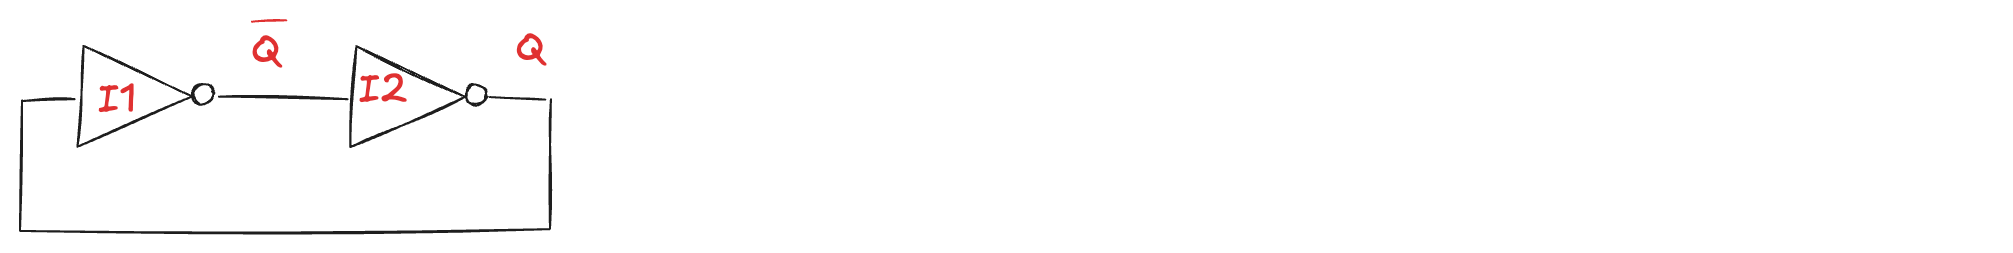

The output of the first inverter feeds the input of the second, and the output of the second feeds back into the first. Although this circuit has no external inputs, it has two outputs which always hold opposite logical values. Because the inverters feed each other, the circuit forms a **cycle**: whatever value one inverter produces becomes the input for the other. What makes this arrangement interesting is that the feedback **reinforces the stored value**. Let us look at the two possible situations:

**Case 1: assume Q=0**

- This means that inverter I1 receives a TRUE input, because it is connected to not-Q.
- As an inverter, I1 outputs FALSE, confirming Q=0
- Meanwhile, inverter I2 receives a FALSE input, and therefore outputs TRUE, confirming not-Q=1

The two values reinforce each other perfectly. Every signal is consistent with the assumption, so nothing tries to change. The circuit naturally stays in this configuration, it is **stable**.

**Case 2: assume Q=1**

- Inverter I1 now receives FALSE and outputs TRUE, maintaining Q=1.
- Inverter I2 receives TRUE and outputs FALSE, maintaining not-Q=0.

Again, the circuit is stable: no signal contradicts our initial assumption.

The crucial point is that the circuit has **two** self-consistent configurations. Both are stable and can persist indefinitely as long as power is supplied. The circuit will stay in one of these states until something external forces it to switch to the other. This ability to hold one of two values makes the cross-coupled inverter pair the **fundamental memory cell** used in digital electronics.

Because it can rest in **exactly two stable states**, we call the circuit **bistable** ("bi" meaning two, "stable" meaning self-sustaining). More generally, a circuit with **N stable states** can store **log_2(N) bits** of information. Since a bistable circuit has N=2 stable states, it stores 1 bit.

The pair of inverters uses feedback to reinforce the current value indefinitely. This means that the present value of Q contains all the relevant information about the past that determines what the circuit will do in the future. If the circuit is in the state Q=0, it will stay in that state; if it is in the state Q=1, it will remain there unless some external event forces it to change.

## Latches

An important limitation of the simple bistable circuit is that it has **no inputs**. It can store a value, but the user cannot directly force it into either state. As a result, when the power supply is first applied, the circuit’s initial state is **unknown and unpredictable**. Small variations in manufacturing, temperature, or electrical noise may push it toward either stable state. Consequently, each time the circuit is powered on, it may spontaneously settle into 0 or 1, and the user has no way to control the outcome.

This lack of control means that, although the cross-coupled inverter pair behaves correctly as a memory element, it is not **practical** for real digital systems. A useful memory cell must allow us not only to **store** information but also to **set** or **update** that information in a controlled and deterministic way.

This limitation is what motivates the introduction of more sophisticated memory element called **latch**, which extend the bistable structure with inputs that allow us to change or load the stored bit predictably.

### SR Latch

Unlike the simple pair of cross-coupled inverters, the SR latch adds **inputs** that allow us to force the stored value to 0 or 1. It is built from **two cross-coupled NOR gates**:

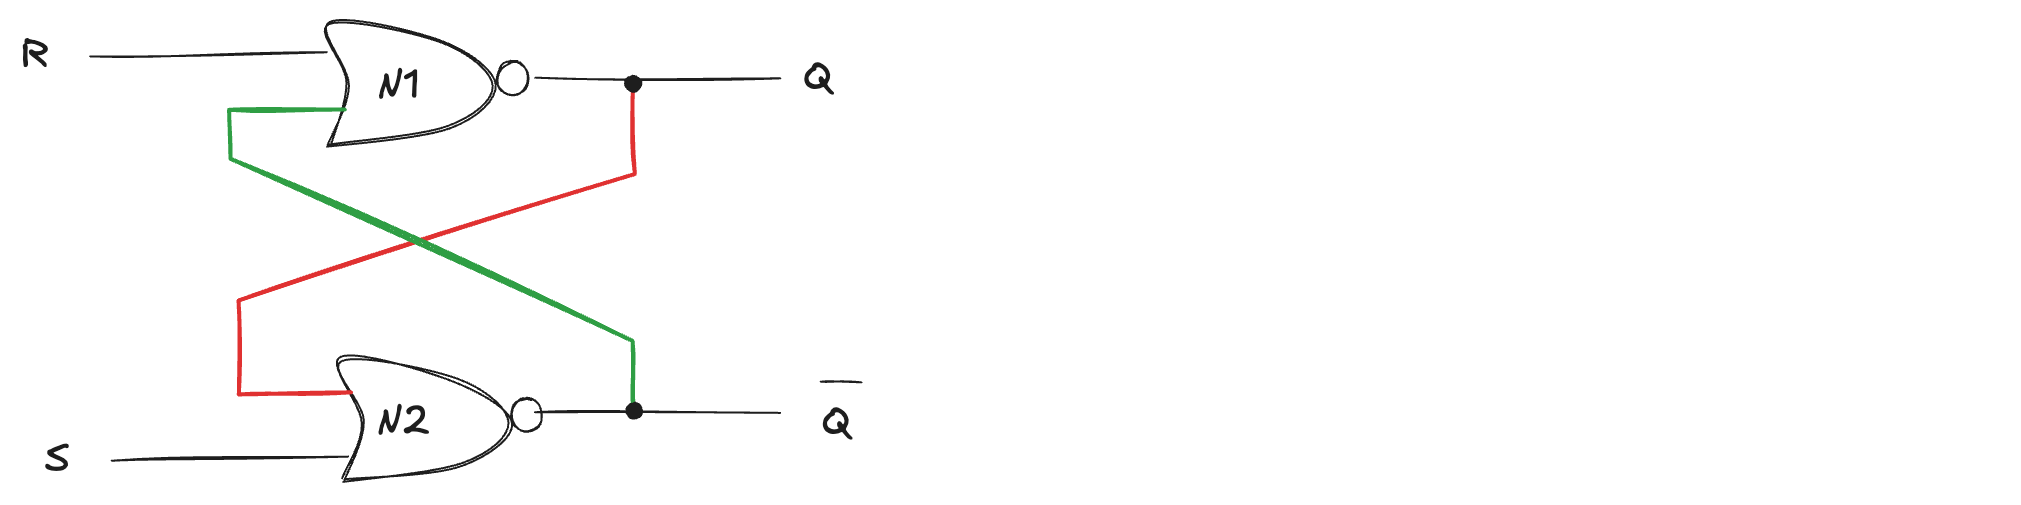

Each NOR gate feeds its output back into the other gate, forming the same kind of feedback loop that provides bistability. But now each gate also receives an external input:

- **S** (Set), which tends to drive the output Q to 1
- **R** (Reset), which tends to drive the output Q to 0

Because of these new inputs, we can deliberately control the internal state of the latch. Recall that a NOR gate outputs 1 only when **all** of its inputs are 0.
If **any** input is 1, the output becomes 0. This property is the key to understanding how the Set and Reset inputs control the latch.

**Case 1: (R=1, S=0), reset the latch**

- N1 receives R=1. Since one of its inputs is TRUE, the NOR output must be FALSE, so Q=0.
- N2 receives both S=0 and Q=0. Both inputs are FALSE, so the NOR output becomes TRUE, meaning not-Q=1.

This result is consistent and stable. The latch ends in the state:

$Q=0,\quad \overline{Q}=1$

The latch has been **reset**.

**Case 2: (R=0, S=1), set the latch**

- N1 receives R=0 and not-Q, which is still unknown at this point, so we cannot determine Q yet. However, we can first look at gate N2.
- N2 receives S=1. Since at least one input to a NOR gate is TRUE, its output becomes FALSE, so not-Q=0.
- With not-Q=0 now known, we revisit N1, which receives inputs R=0 and not-Q=0. Both inputs are FALSE, so the NOR output becomes TRUE.

Again, the circuit reaches a consistent and stable state:

$Q=1,\quad \overline{Q}=0$

The latch has been **set**.

Now that we have seen how the SR latch behaves when either Set or Reset is asserted, we can examine the remaining input combinations.

**Case 3: (R=0, S=0), hold state**

- N1 receives input R=0 and not-Q, that we do not yet know.
- N_2 receives inputs S=0 and Q, that we also do not yet know.

At first glance, the circuit looks **ambiguous**. However, we know that the latch must already be in one of its two stable states, either Q=0 or Q=1. So let us analyse both possibilities.

**Assume Q=0**

- N2 receives two FALSE inputs, so its output must be TRUE, meaning not-Q=1
- N1 receives one TRUE input, so its output must be FALSE, confirming Q=0

**AssumeQ=1**

- N2 receives a TRUE input, so its output must be FALSE, giving not-Q=0.
- N1 receives two FALSE inputs, so its output must be TRUE, confirming Q=1

In both cases, the circuit remains stable and consistent. Therefore, when both Set and Reset are 0, the latch **retains its previous state**.

**Case 4: (R=1, S=1), forbidden condition**

Since N1 and N2 both see a 1, their outputs must go to 0. This means the circuit produces:

$Q=0,\quad \overline{Q}=0$

But this is **not valid**, because in we expect the two outputs to be complements of each other. Moreover, when both R and S return to 0, the latch may unpredictably fall into either final state depending on tiny differences or noise. For this reason, it is considered an illegal or forbidden input combination, and real systems are designed to avoid it.


The behaviour of the SR latch can be neatly summarized using a truth table. This table captures the four combinations of the inputs S and R, and shows the resulting outputs Q. The table also reflects the latch’s ability to remember its previous value:

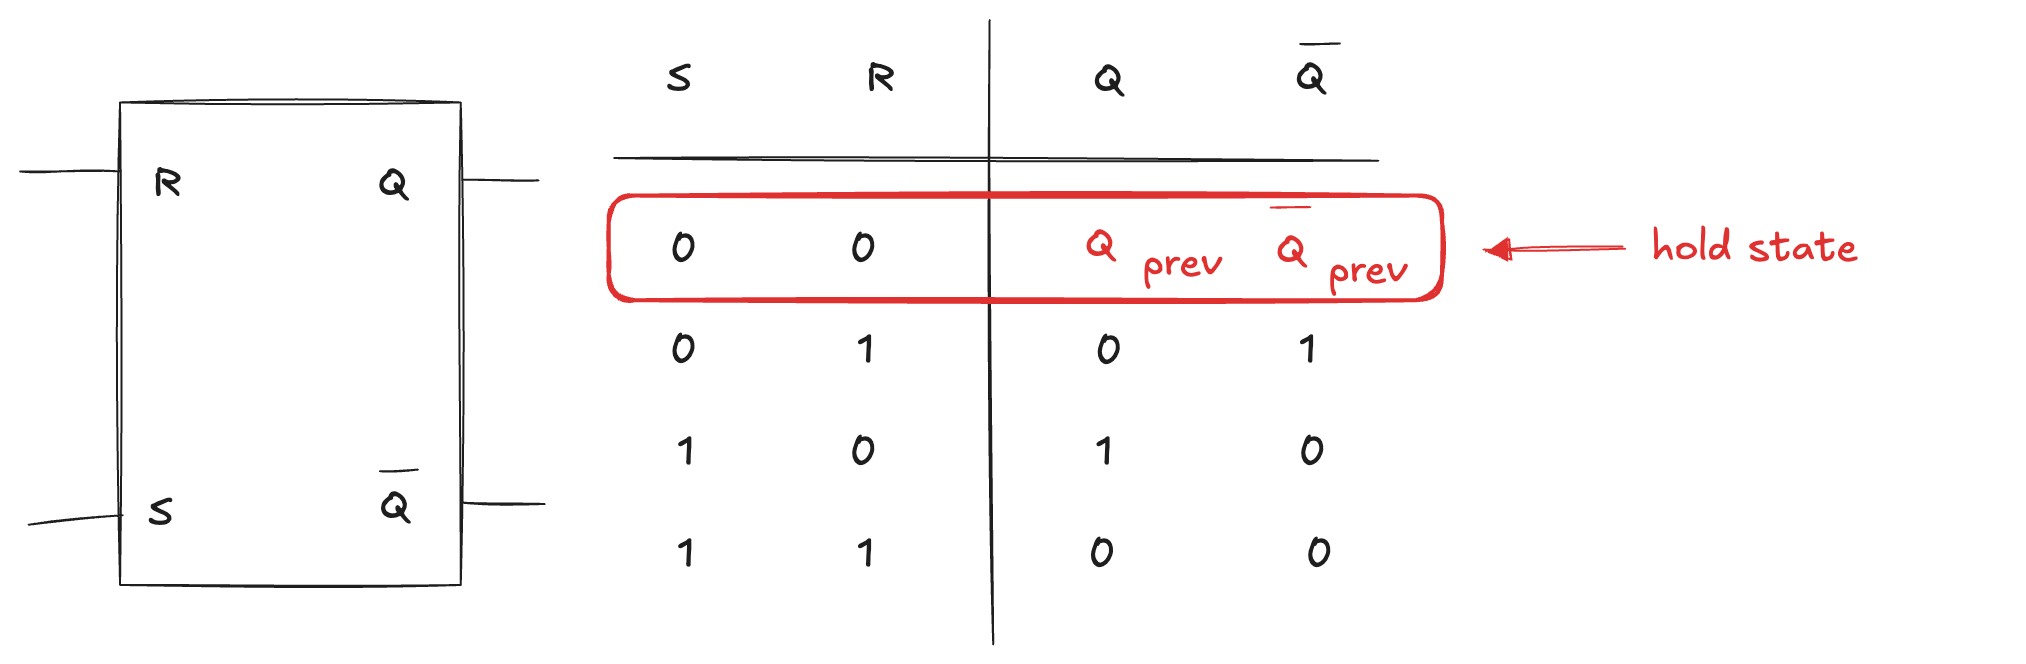

Putting these observations together:

- When R=1 or S=1, the latch is forced into a known state.
- When R=0 and S=0, the latch simply remains in whatever state it was in before

This means the latch **stores one bit of information**. The combination R=0, S=0 is the "hold" condition: the latch **remembers** the last value that was written into it. This is the **fundamental idea behind memory** in digital systems.

We can use VHDL processes to describe the behaviour of the SR latch as follows:

In [ ]:
entity SR_LATCH is
    port( S: in std_logic;
          R: in std_logic;
          Q: out std_logic
    );
end SR_LATCH;

The output may change in response to an event on either signal S or signal R. For this reason, both signals must appear in the sensitivity list:

In [ ]:
architetcture rtl of SR_LATCH is
begin
    latch: process(S, R)
    begin
        if( S='1' and R='0') then
            Q <= '1';
        elsif( S='0' and R='1') then
            Q <= '0';
        elsif( S='0' and R='0') then
            null;
        elsif( S='1' and R='1') then
            Q <= 'X';
        end if;
    end process;
end rtl;

The behaviour of the SR latch depends on the values of the control signals S and R, and it is immediately sensitive to any event on either of them; otherwise, the latch preserves its current state. It is important to highlight a key aspect of the specification: when both control signals are zero, the latch, although enabled, must hold its previous value. To express this behaviour in VHDL we use the **null statement**, which explicitly denotes that no action is to be taken.

### D Latch

The SR latch works, but it has two important drawbacks. First, it **behaves unpredictably** when both S and R are asserted at the same time, producing an invalid state. Second, the meanings of S and R **mix together two different ideas**:

- **What** value the latch should take (set or reset)
- **When** the latch should update its value

Because these two concepts are tied to the same pair of inputs, the SR latch is awkward to use in more complex designs. Digital systems are much easier to design when we separate the **data** we want to store and the **moment** when the storage should occur. This separation is exactly what the **D latch** provides:

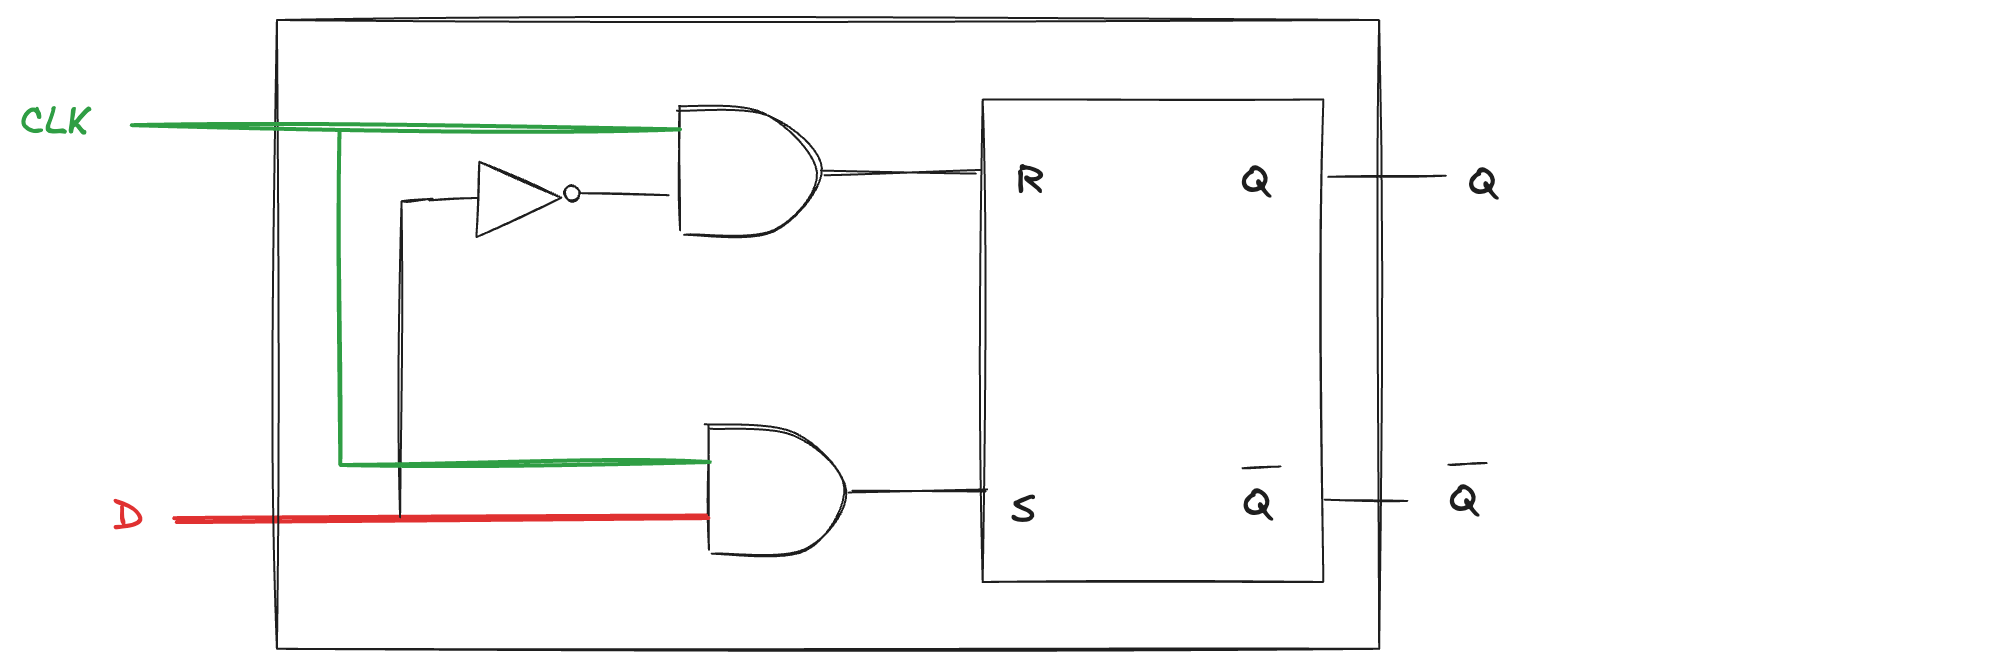

The D latch avoids the invalid S=1, R=1 condition entirely by using a single **data input (D)** to tell the latch what the next value of (Q) should be, and a **clock input (CLK)** to tell the latch when it is allowed to change its state Internally, the D latch transforms the single data input into appropriate S and R signals using two AND gates controlled by the clock:

- When **CLK=0**:
    - Both AND gates are disabled
    - So both S and R are 0
    - The latch is in the **memory** mode
    - Q simply holds its previous value, regardless of D
    - The circuit is effectively **closed** to new data

- When **CLK=1**:
    - The value of D determines which AND gate becomes active
    - If D=1 the upper AND produces S=1, R=0 and the latch is **set**
    - If D=0 the lower AND produces S=0, R=1 and the latch is **reset**
    - In either case, Q=D and the latch becomes **transparent** to the data


The truth table summarizing the D latch behaviour is:

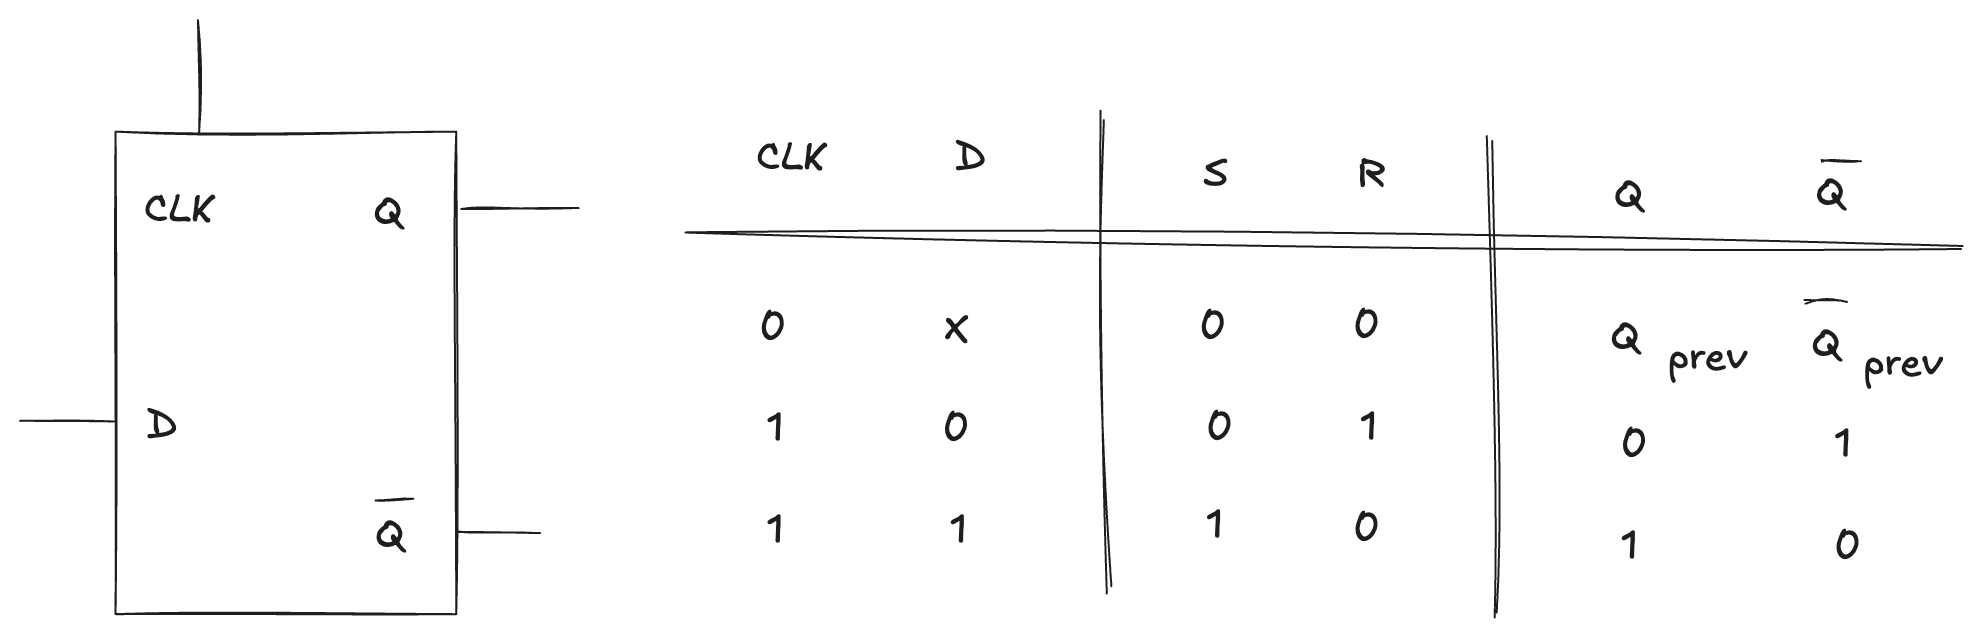

When the **clock is low**, the latch **remembers** its previous value. When **the clock is high**, the latch **copies** whatever value is present on D directly to Q. This design completely eliminates the ambiguity of the SR latch, because the D latch never attempts to set and reset at the same time.

The entity declaration for the D latch is the following:

In [ ]:
entity D_LATCH is
    port( D: in std_logic;
          CLK: in std_logic;
          Q: out std_logic
        );
end D_LATCH;

The output may change in response to an event on either signal D or signal CLK. For this reason, both signals must appear in the sensitivity list. We also note that the output is updated only when the enable signal is high; when it is low, the output must remain unchanged. The resulting architecture is therefore the following:

In [ ]:
architetcture rtl of D_LATCH is
    begin
        latch: process(D, CLK)
        begin
            if( CLK = '1' ) then
                Q <= D;
            end if;
        end process;
end rtl;

The first thing to notice is the absence of an else branch. This omission is **an error when the intention is to describe purely combinational behaviour**. The intuitive reason is the following: since the description does not explicitly state what should happen when the value of CLK is not equal to 1, the synthesis tool assumes that any signal assigned within the process (i.e., any signal appearing on the left-hand side of an assignment) must retain its previous value. This, in turn, **requires the presence of a memory element** capable of holding that value.

Summarizing, the D latch is the first memory element that cleanly separates **what to store** from **when to store it**, which is crucial for synchronous digital design.

## Flip-Flops

In a D latch, the clock signal controls the moment when new data is allowed to flow into the storage element. When the clock is high (CLK=1), the latch becomes **transparent**: the value present on the D input passes directly to the output Q, almost as though the latch were just a buffer. Any changes in D immediately appear at Q for as long as the clock remains high. When the clock is low (CLK = 0), the latch becomes **opaque**: new data can no longer reach Q, and the latch instead holds and preserves the value it had at the instant the clock transitioned from high to low.

This simple mechanism gives the designer control over **when information is allowed to enter the latch**. However, this behaviour also introduces a **subtle timing problem** that is not obvious from the truth table. Real signals do not change instantaneously; every transition takes a finite amount of time to propagate through gates and wires. As long as the clock remains at 1, the latch is continuously transparent, meaning that **any small disturbance or glitch on the D input can propagate through the combinational logic and appear directly at Q**. If D changes near the moment when the clock transitions from high to low, the latch may briefly enter an unstable region before finally settling. Depending on the exact timing, the latch might capture the "old" value, the "new" value, or even oscillate momentarily before stabilizing.

This characteristic is known as the **level-sensitive** nature of a latch: it responds to the **level of the clock**, not to a **precise instant**. This timing difficulty motivate the next refinement in sequential design: the **edge-triggered device** called **flip-flop**, which restricts the moment of state change to a **single, well-defined event** (the **rising or falling edge of the clock**).


### D Flip Flop

The D flip-flop solves the timing problems that arise with level-sensitive latches by ensuring that the stored value changes **only at a single, well-defined instant**: the clock edge. Instead of responding throughout an entire interval when the clock is high (as the D latch does), the flip-flop updates its state only at the moment the clock transitions. This creates a clean boundary between one state and the next and prevents race-through effects. The flip-flop is built from **two D latches connected in series**, commonly referred to as the **master** and the **slave**: 

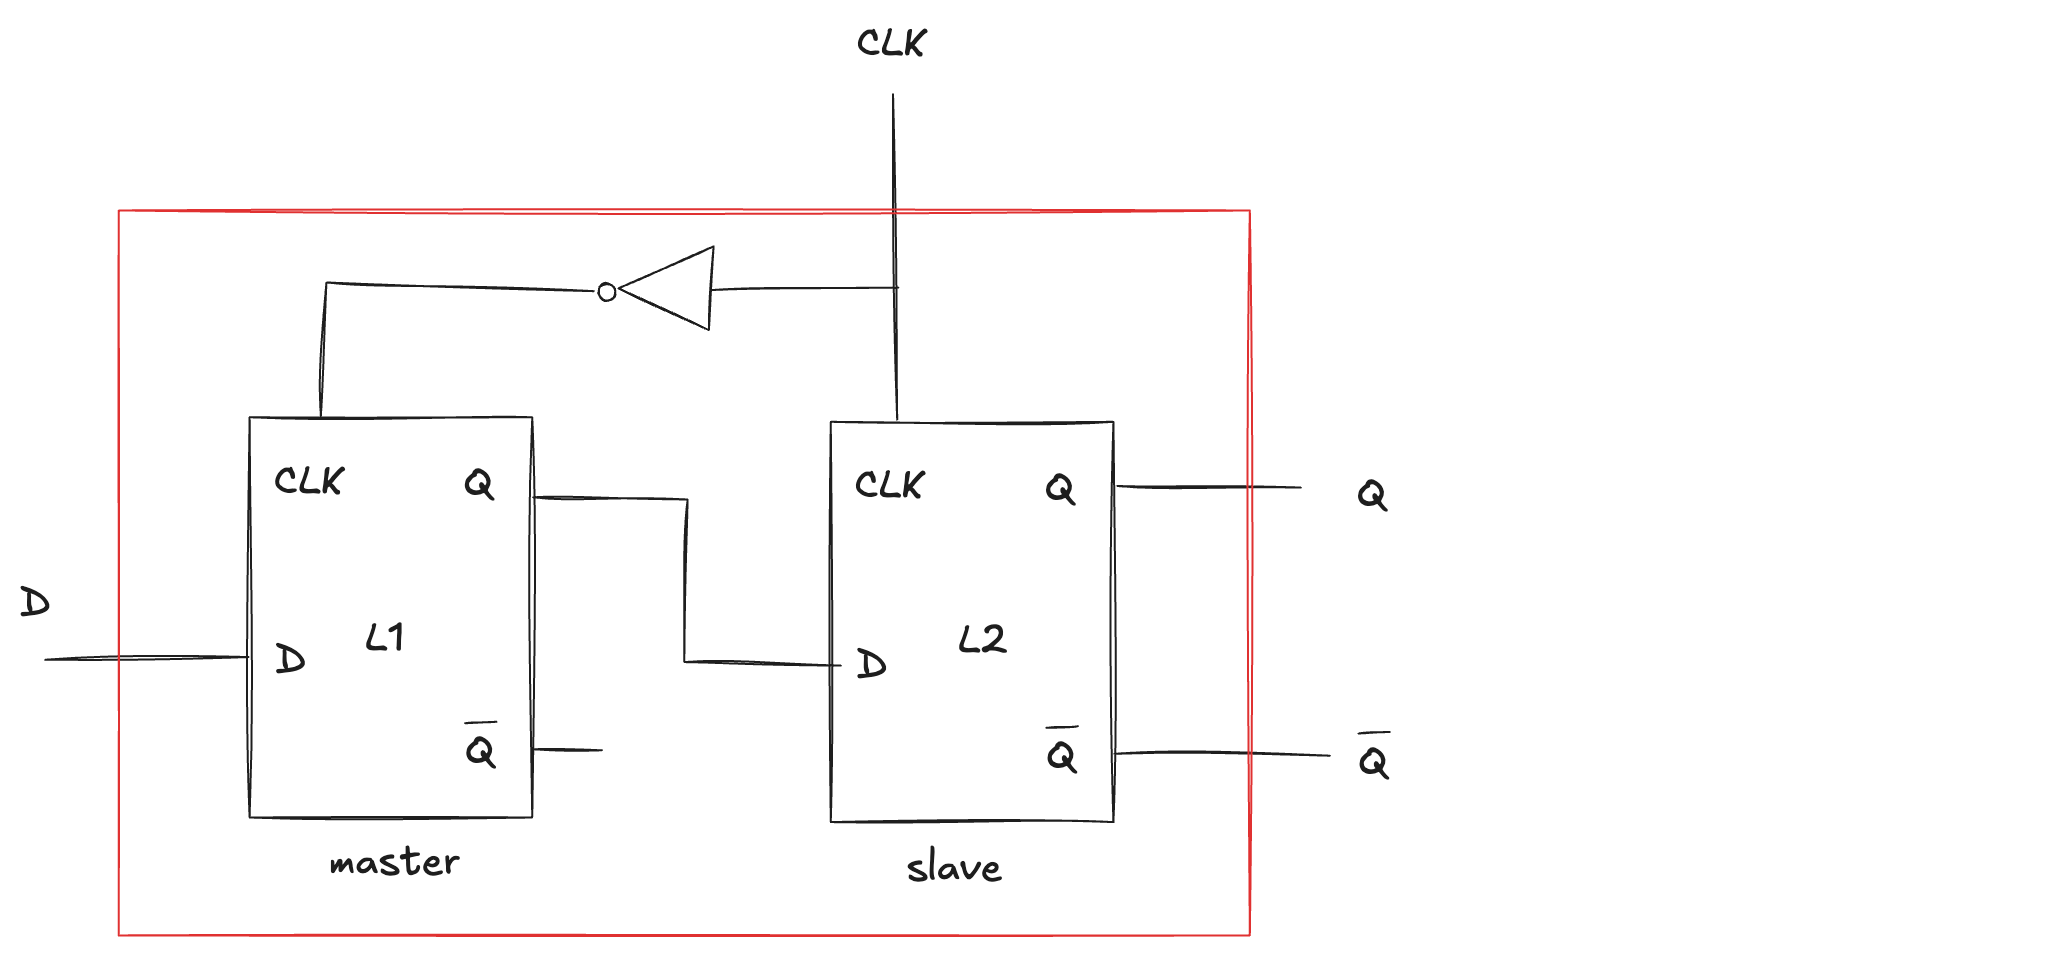

These two latches are controlled by **complementary clock signals**. When the clock is low, the master latch is transparent while the slave latch is opaque. This means that during the low phase, the master is free to track the D input, but the slave remains locked, holding the previous output value. When the clock switches to high, the situation reverses: the master becomes opaque, freezing whatever value it captured just before the transition, while the slave becomes transparent and copies the master’s stored value to the output Q.

This arrangement has a crucial consequence: **the final output Q changes only at the moment the clock rises**. While the clock is low, the master may still be following D, but the slave cannot see those changes. When the clock rises, the master closes instantly (blocking any further input changes), and exactly at that same moment the slave opens and captures the master’s stable value. Because the slave sees only the value that was already settled inside the master at the clock edge, the output cannot be influenced by any glitches or delays that may occur after the transition. Between edges, the slave remains opaque, and the output stays constant.

This edge-sensitive behaviour is what defines the D flip-flop: **D determines what the next state will be, and the clock edge determines precisely when that new state becomes active**. The flip-flop therefore cleanly separates "what to store" from "when to store it", solving the ambiguity inherent in level-sensitive latches and making it possible to build synchronous circuits in which every memoery element in the system updates in perfect lockstep. The schematic symbol for the D flip-flop emphasizes this event-driven nature:

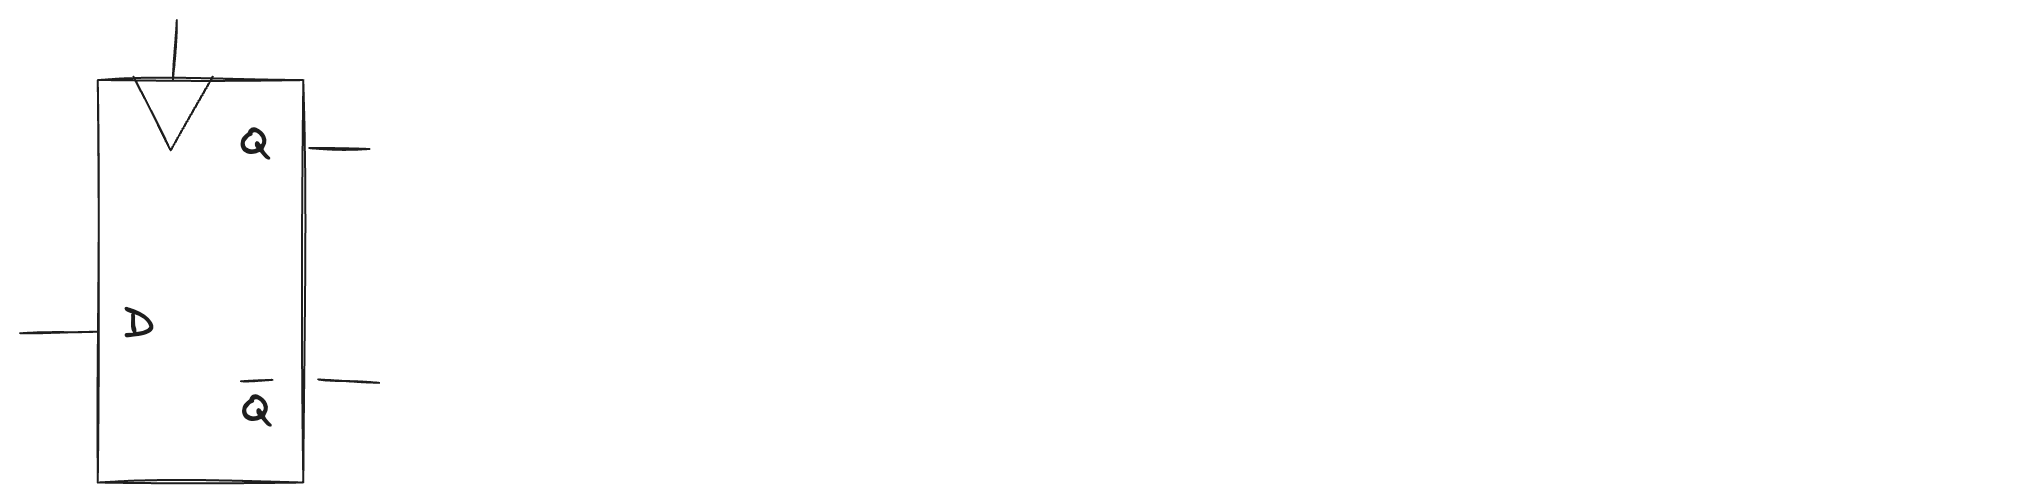

The small triangle on the clock input marks it as an **edge-triggered device**. In a rising-edge D flip-flop—the most common variety—the triangle indicates **sensitivity to the low-to-high transition**. Regardless of what happens on D before or after that instant, only the value that is present exactly at the rising edge is captured and stored.

We now begin with the description of the entity for the D flip-flop

In [ ]:
entity D_FF is
    port( CLK: in std_logic;
          D: in std_logic;
          Q: out std_logic
    );
end D_FF;

In the case of latches, the condition controlling the update of the output depended on the level of the CLK signal and could therefore be expressed simply by comparing that signal to the desired logic value (0 or 1). For flip-flops, the situation is more complex because the update must occur only in correspondence with a signal transition To make this concrete, assume that the device is sensitive to the rising edge of the clock. In this case, two conditions must be checked:

- an event has occurred on the clock signal
- the value of the clock after the event is '1'

To express the occurrence of an event, however, we must use a specific VHDL construct based on the notion of a **signal attribute**. In this case, we need to verify that the event attribute of the clock signal is true. The combined condition is therefore written as follows:

In [ ]:
if(CLK'event and CLK = '1) then
    ...
end if;

Since the device must preserve its state in the absence of a rising edge on the clock signal, the else branch of the if statement must again be omitted. It is also clear that the data signal D should not appear in the sensitivity list of the process, because the flip-flop’s state is not affected by events on that signal. Based on these considerations, we can now proceed to specify the architecture:

In [ ]:
architecture rtl_rising_edge of D_FF is
    begin
        ff: process(CLK)
        begin
            if(CLK'event and CLK='1') then
                Q <= D;
            end if;
        end process;
end rtl_rising_edge;

If we wish to describe a D flip-flop that is sensitive to the **falling edge**, it is sufficient to check that the value of the clock signal after the event is '0' rather than '1', that is:”

In [ ]:
architecture rtl_falling_edge of D_FF is
    begin
        ff: process(CLK)
        begin
            if(CLK'event and CLK='0') then
                Q <= D;
            end if;
        end process;
end rtl_falling_edge;

A better way to check the rising edge of the clock is to use the **rising_edge function** provided by the ieee.std_logic_1164 package:

In [ ]:
 state_register : process(CLK)
    begin
        if rising_edge(CLK) then
            Q <= Q_next;
        end if;
    end process;

The use of rising_edge(CLK) is preferred today because it is the IEEE-standard, safer, and more robust way of detecting a clock edge. It avoids glitches, handles std_logic correctly, improves synthesis compatibility, and produces clearer and more portable code. All major tools (Synopsys, Xilinx, Intel, Mentor, Cadence) detect it immediately as a clock and generate better timing reports.

### Flip-Flops and Latches comparison

The behaviour of a D latch and a D flip-flop becomes especially clear when we apply the same D and CLK waveforms to both devices and observe how their outputs evolve over time:

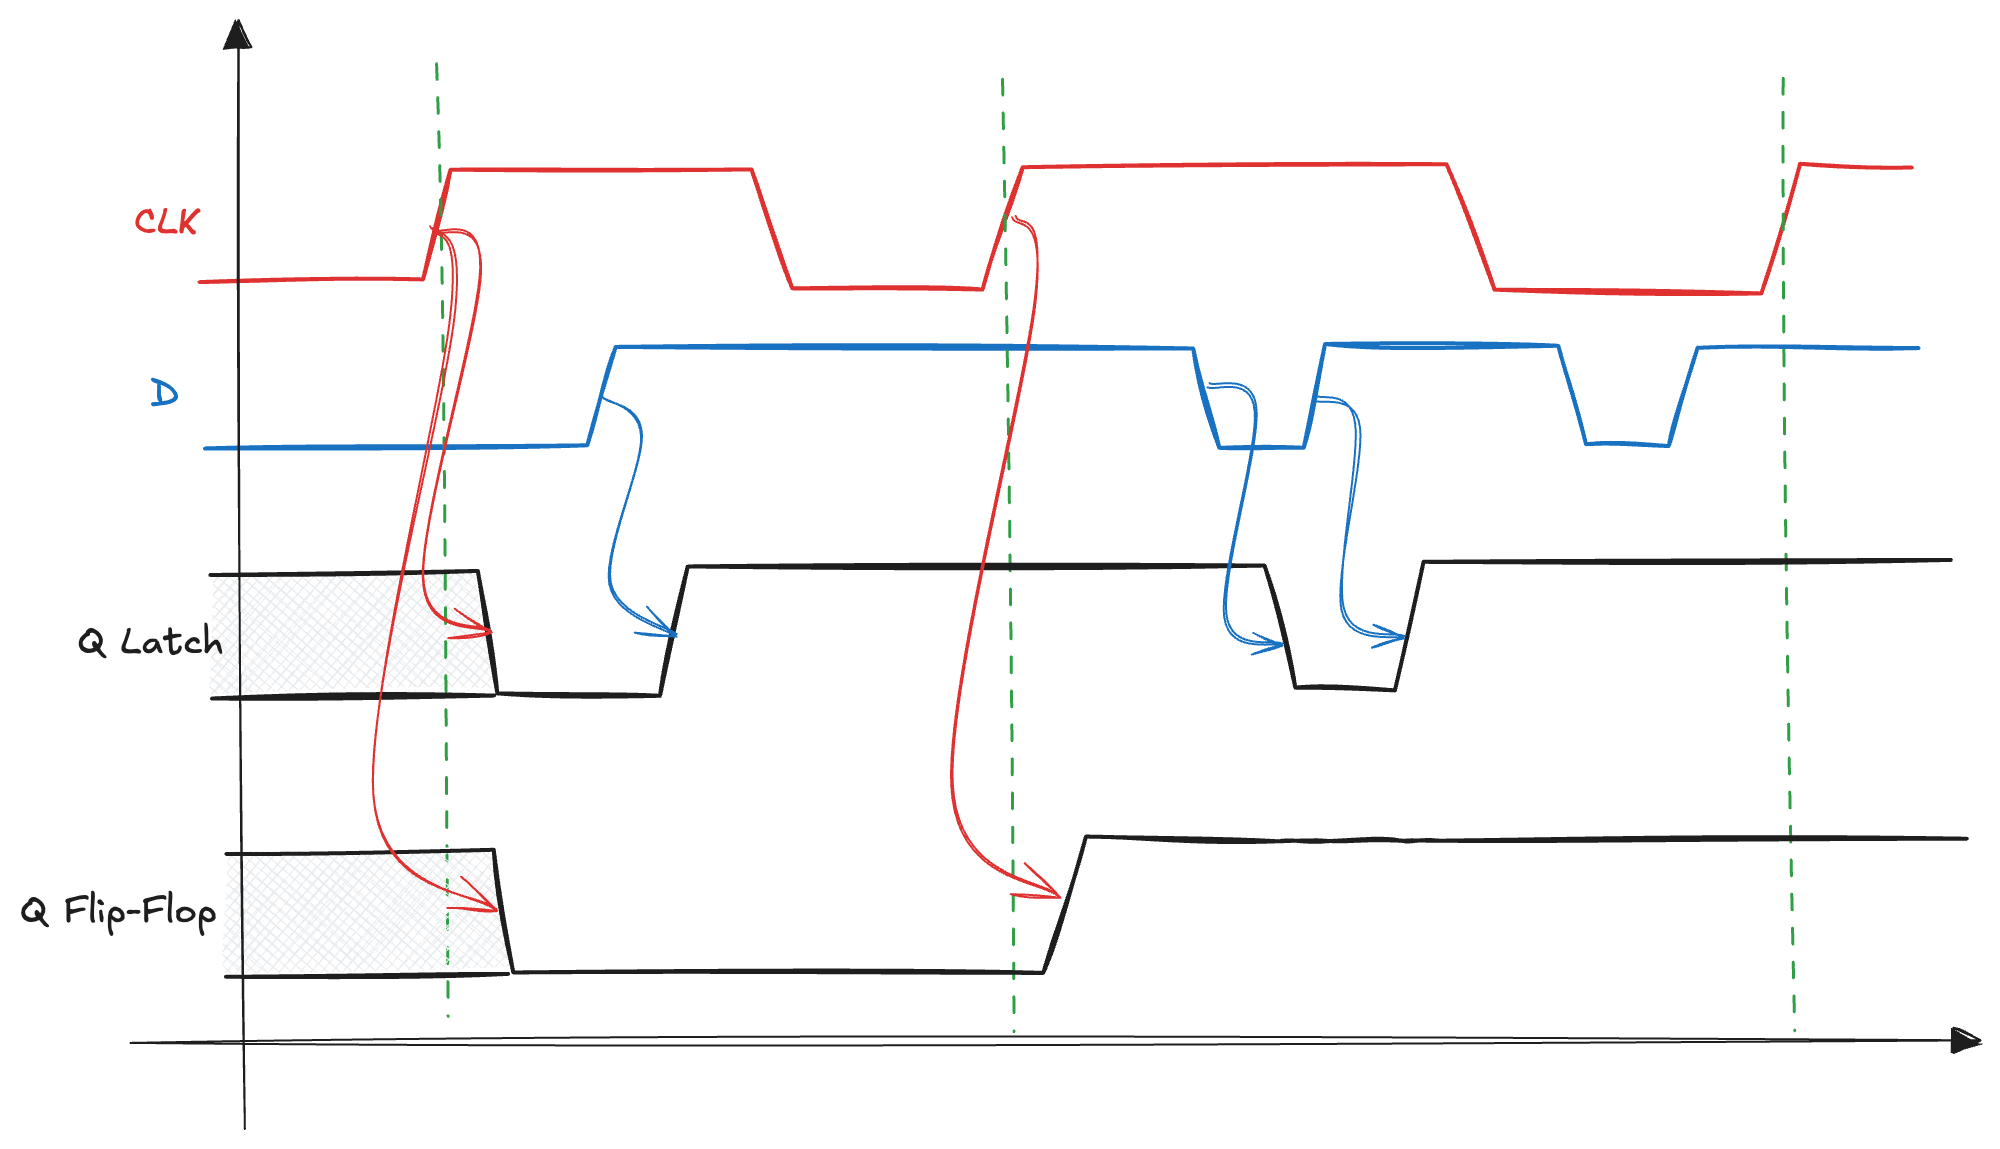

At the beginning of the sequence, the output Q is unknown for both elements, since we have not yet applied a clock event or an initial condition. What happens next, however, depends entirely on whether the storage element is level-sensitive or edge-triggered.

The D latch responds whenever the clock is high. At the first rising transition of CLK, the latch becomes transparent, and because D is low at that moment, Q immediately drops to zero. As long as CLK remains high, the latch continues to follow any changes on D. If D wiggles or produces glitches while the clock is high, those same variations appear at the latch output. When the clock falls back to zero, the latch becomes opaque and stops responding to input changes; whatever value Q held at that moment is preserved. If D changes while CLK is low, the latch ignores it completely.

The flip-flop behaves very differently. Being edge-triggered, it samples the input only at discrete instants: specifically, on the rising edge of the clock. At each of these clock edges, the value present on D is captured and transferred to Q. Between edges, the stored value remains stable, even if D changes multiple times or glitches. The output therefore changes only at well-defined moments, giving a clean, staircase-like waveform with no intermediate transitions.

By comparing the two signals, we can see the essential difference. The latch is controlled by the **level** of the clock and is therefore transparent whenever the clock is high; this makes it sensitive to the exact timing of D changes during that interval. The flip-flop, by contrast, compresses the entire clock-high interval into a **single event** (the rising edge) which eliminates uncertainty and prevents unintended propagation of input transitions. This contrast explains why latches can lead to timing hazards in large synchronous systems, whereas flip-flops provide the predictable, edge-defined behaviour needed for reliable digital design.

### Registers

Once we have a reliable edge-triggered flip-flop, we can begin to assemble **more powerful storage structures**. The simplest and most fundamental of these is the **register**. An N-bit register is nothing more than a collection (or **bank**) of N flip-flops placed side by side. Each flip-flop stores one bit, and all of them share the **same clock signal**. This shared clock is what gives the register its defining property: all bits update **simultaneously** on the same clock edge.

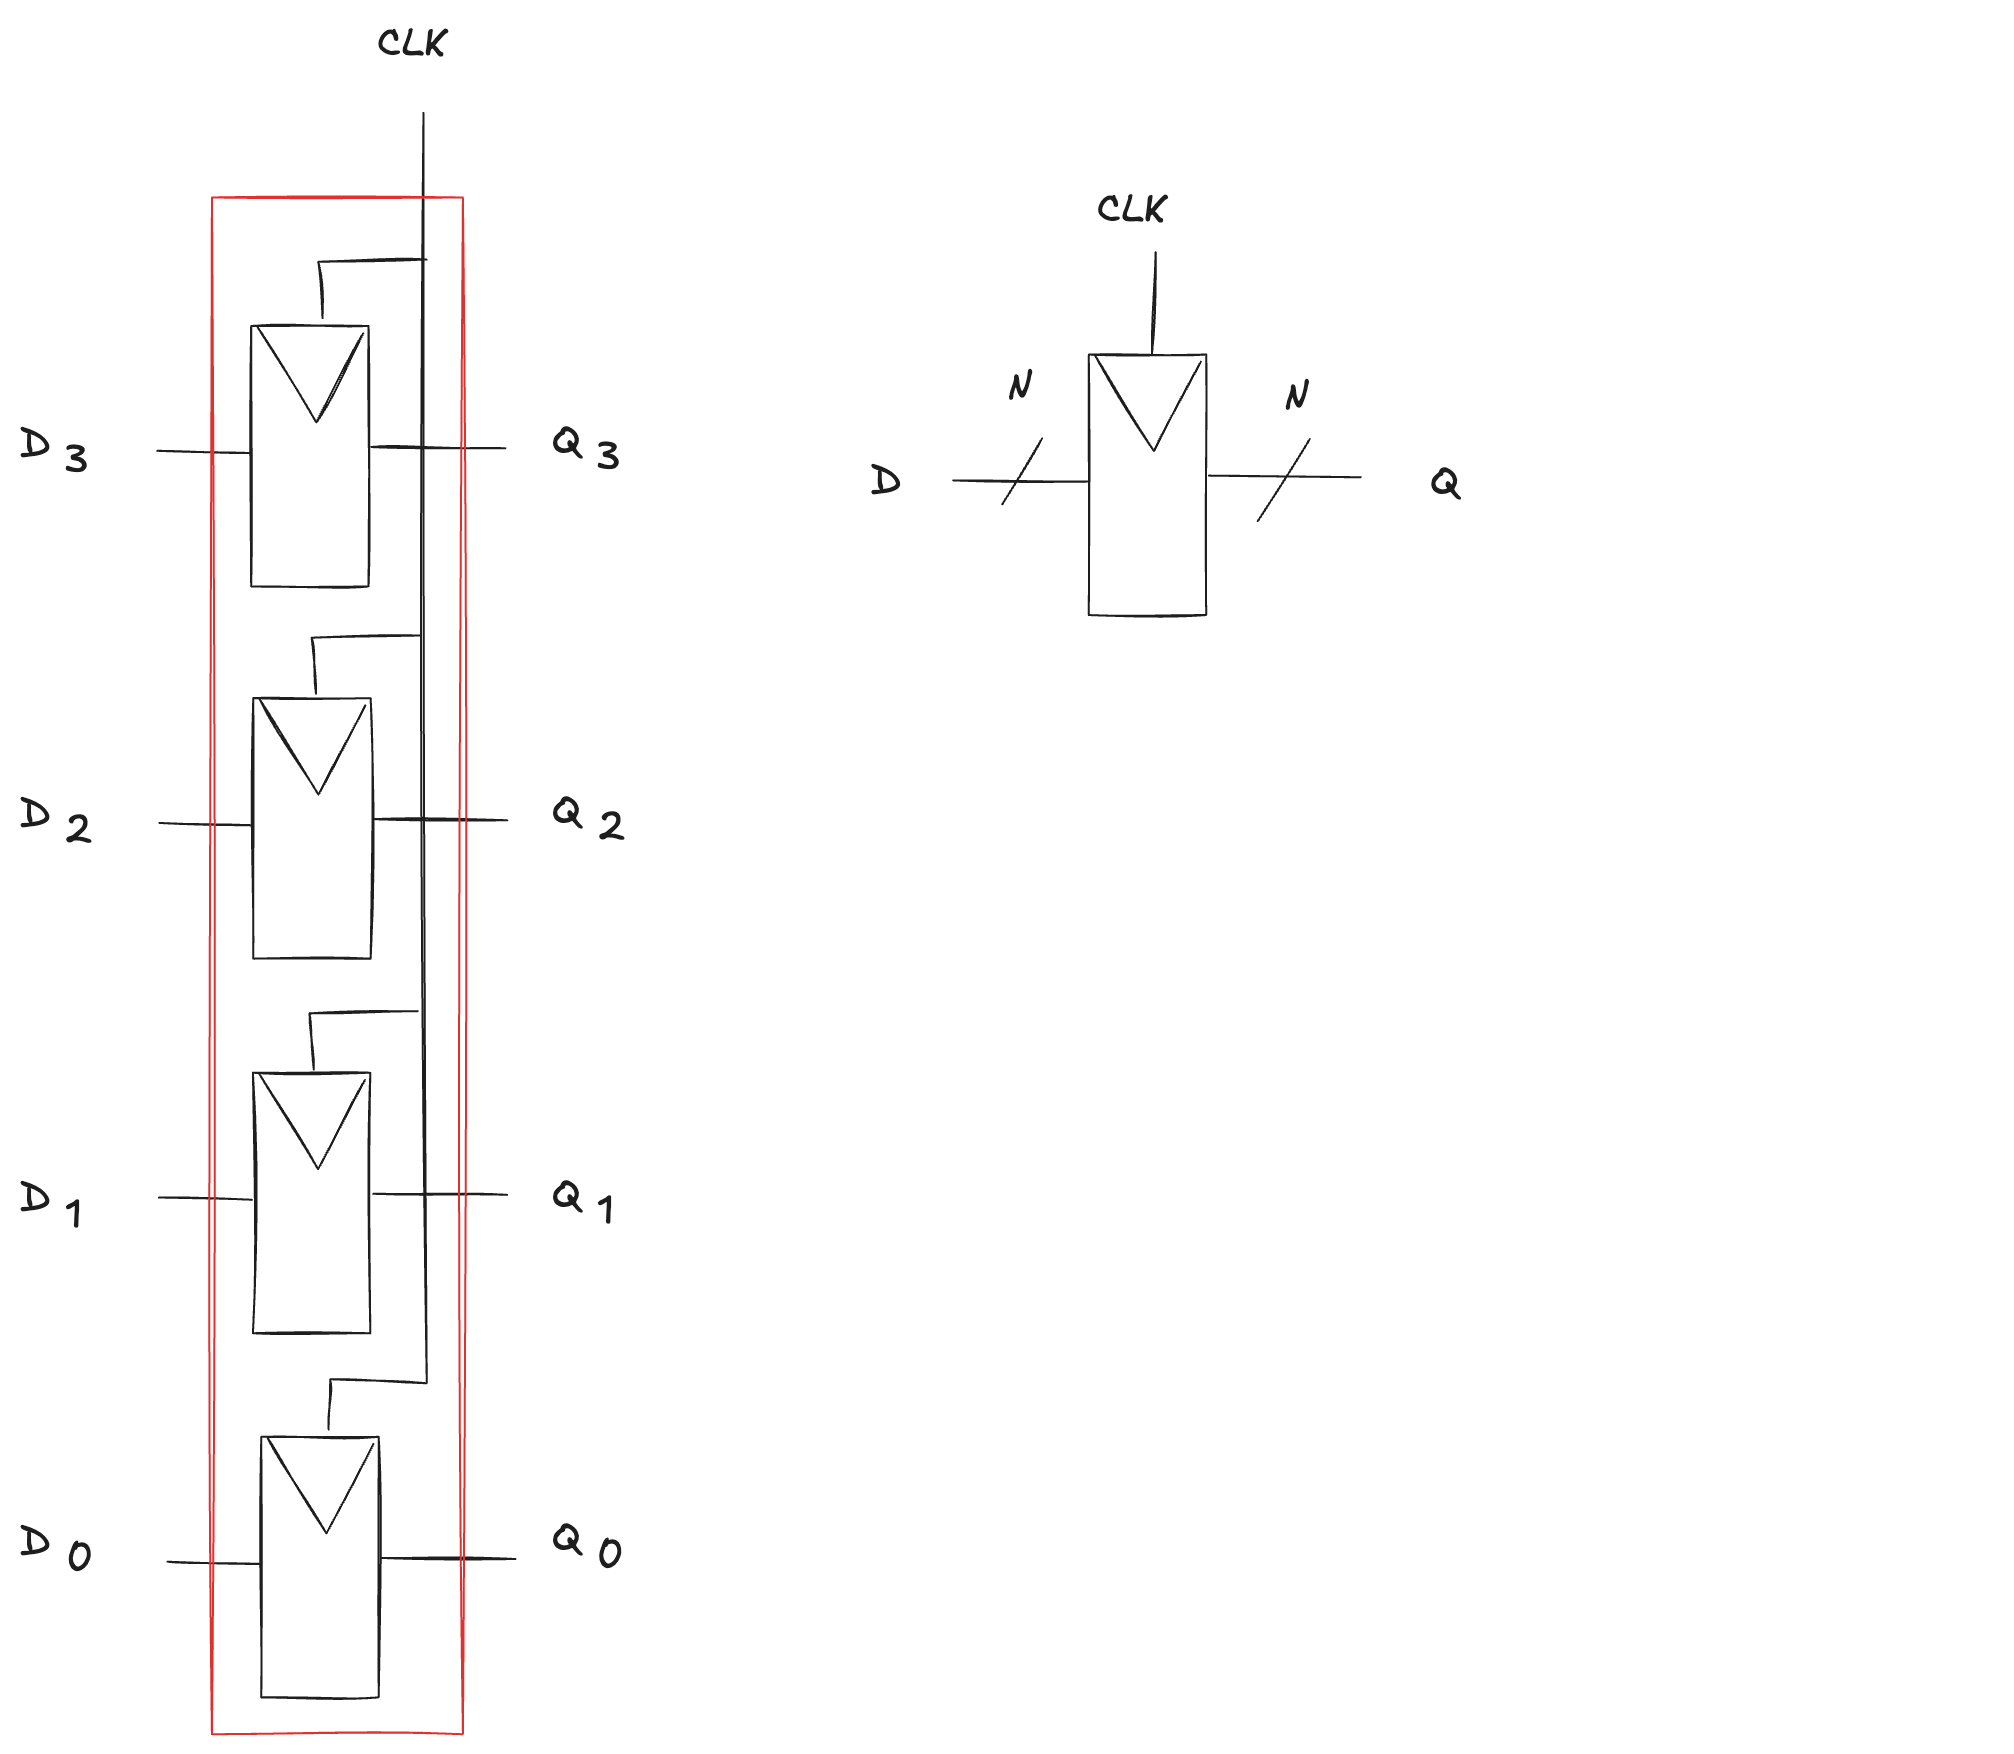

This arrangement allows a register to capture an entire multi-bit value in one atomic operation. When the clock edge arrives, every flip-flop in the bank samples its corresponding input bit and updates its output. Between clock edges, the outputs remain stable, holding the stored N-bit word. In this way, the register acts as a discrete-time storage element: it updates only at well-defined instants and remains unchanged at all other times.

The VHDL description of an N-bit register is straightforward. We define an entity with N-bit input and output ports, and inside the architecture we instantiate N flip-flops, all driven by the same clock signal. The process that describes the behaviour of the register looks like this:

In [ ]:
entity Register is
    generic(N : integer := 8);
    port(CLK : in  std_logic;
         D   : in  std_logic_vector(N-1 downto 0);
         Q   : out std_logic_vector(N-1 downto 0)
    );
end Register;

In [ ]:
architecture structural of Register is
    component D_FF is
        port(CLK : in  std_logic;
             D   : in  std_logic;
             Q   : out std_logic
        );
    end component;
begin
    GEN_FF : for i in 0 to N-1 generate
        FF_i : D_FF
            port map(CLK => CLK, D => D(i), Q => Q(i));
    end generate GEN_FF;

end structural;

Observe thant the **for–generate loop** is synthesizable because it does not describe an iterative behavior in time. Instead, it describes multiple copies of hardware that the synthesizer can fully expand at compile time.

Registers play a central role in almost every sequential digital system. They hold counters, intermediate results in arithmetic units, configuration values, memory addresses, instructions, pipeline state, and much more. In fact, the internal state of a processor at any moment can largely be described as the contents of its various registers. Because they update synchronously and predictably, registers make it possible to design complex systems in which data moves from one stage to the next in a coordinated rhythm dictated by the global clock.

### Enabled Flip-Flop

In many designs, it is unnecessary (or even undesirable) for a flip-flop to update its stored value at **every single clock edge**. For example, a counter should update only when a count-enable signal is active, a configuration register should change only when software writes to it; and pipeline registers should only accept new data during certain phases of execution. To support this behaviour, we add an additional input to the flip-flop: **Enable**.

The Enable signal determines whether the flip-flop should load a new data value on the next clock edge. When Enable is true, the flip-flop behaves just like an ordinary D flip-flop: the value on D is sampled at the rising edge of the clock and becomes the new output Q. When Enable is false, the flip-flop simply ignores the clock edge and retains its old state indefinitely. This gives fine-grained control over when the stored value is allowed to change, while preserving the clean, edge-triggered timing behaviour of the underlying flip-flop.

There are two main ways to build such an enabled device. The most common and safest method inserts a **multiplexer** in front of the D input. The multiplexer chooses between two values: the external input D, or the flip-flop’s own previous output Q. When Enable is true, the multiplexer forwards the external input so the flip-flop can update. When Enable is false, the multiplexer instead selects the old Q value, effectively "recirculating" the stored bit. Even though the clock still toggles, the flip-flop sees no change at its input and therefore maintains its previous state

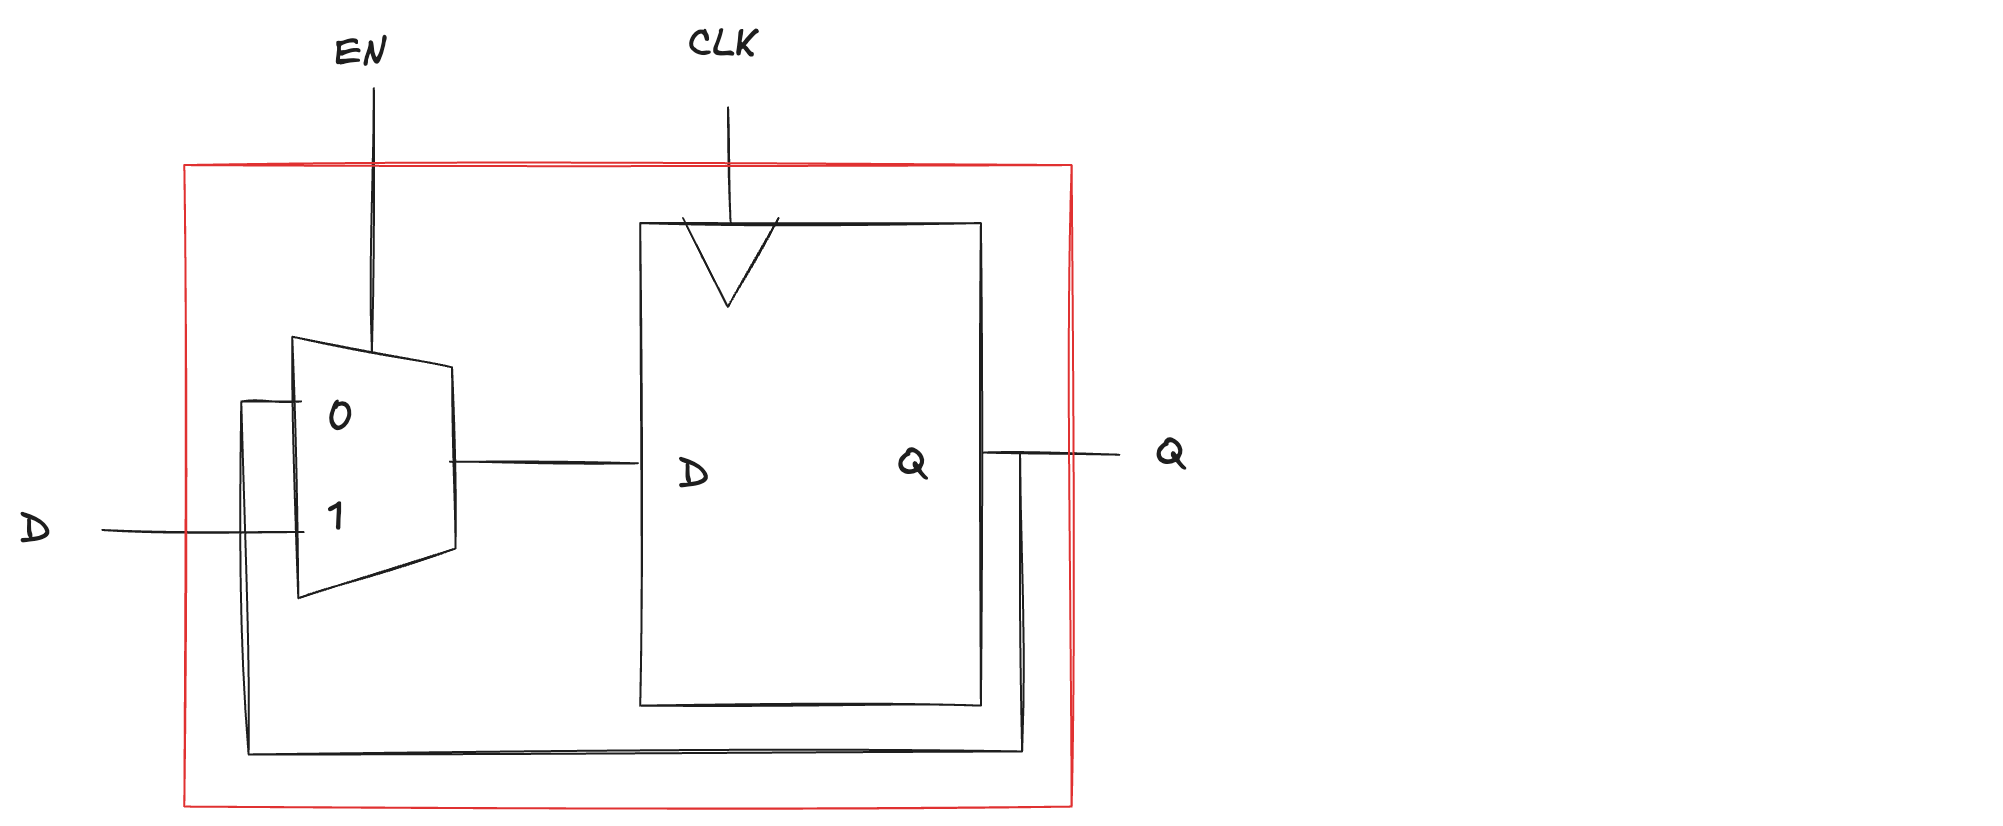

The VHDL description is:

In [ ]:
entity DFF_en is
    port(CLK : in  std_logic;
         EN  : in  std_logic;
         D   : in  std_logic;
         Q   : out std_logic
    );
end entity;

architecture rtl of DFF_en is
begin
    process(CLK)
    begin
        if rising_edge(CLK) then
            if EN='1' then
                Q <= D;                   
            end if;                            
        end if;
    end process;
end rtl;

A second method modifies the clock itself. In this approach the clock signal is AND-ed with the Enable signal. If Enable is true, the clock passes through normally; if Enable is false, the clock is forcibly held low, preventing any edge from reaching the flip-flop. 

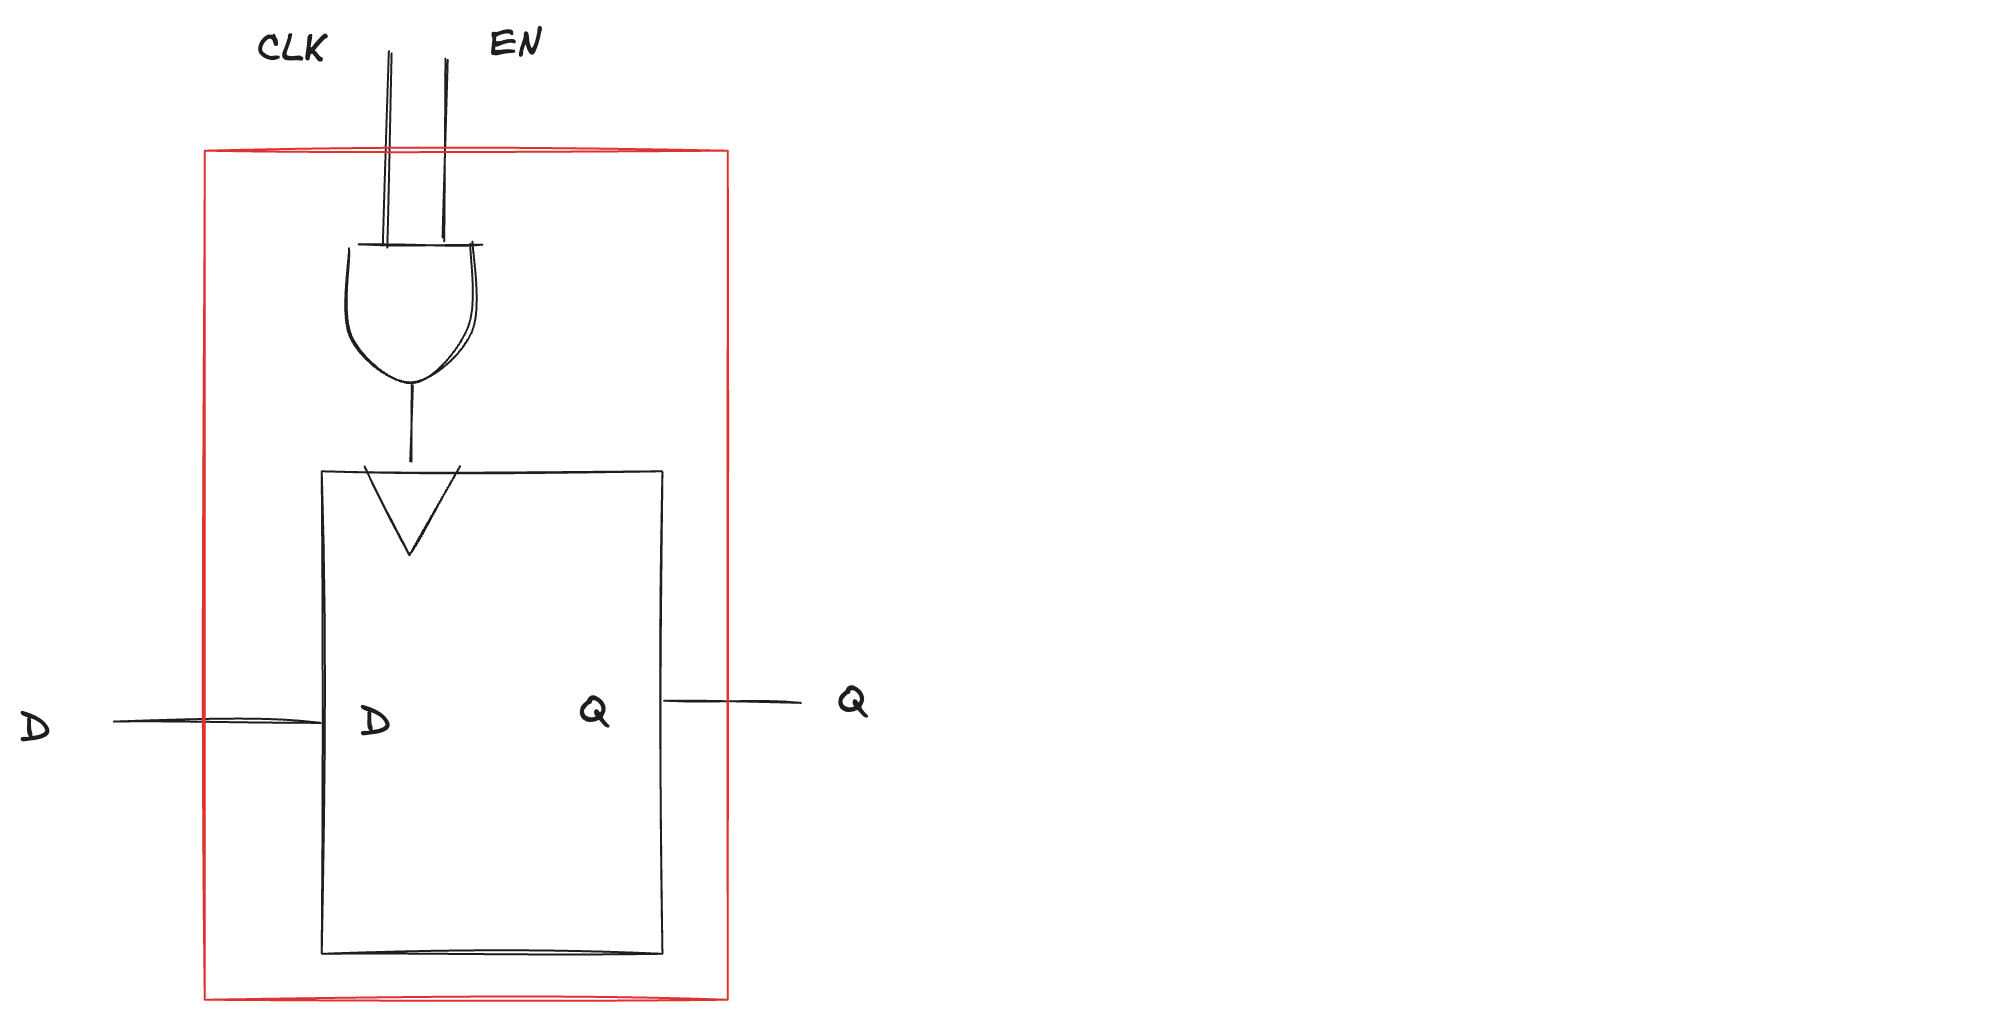

Although this approach seems elegant, it is **extremely delicate**: if Enable changes while the clock is already high, the AND gate can produce a **glitch**, a tiny unintended pulse that the flip-flop interprets as an additional clock edge. This can cause the device to capture data at the wrong moment, leading to subtle and difficult-to-debug timing errors. For this reason, performing any kind of logic directly on the clock signal is widely considered a bad practice in synchronous design.

The multiplexer-based implementation avoids these hazards entirely, because the clock remains clean and untouched. The enable logic influences only the input data path, not the timing reference of the entire system. This preserves the integrity of the clock domain and ensures predictable, reliable behaviour even in large systems. For these reasons, essentially all modern digital design tools and hardware description languages generate **mux-enabled flip-flops** by default when the designer describes an "if enable then load else keep" behaviour.

### Resettable Flip-Flop

In a real digital system, it is often essential to start from a **known state**. When a processor powers on, all its registers and sequential elements are in random, unpredictable conditions, since each flip-flop may have settled into either 0 or 1 depending on tiny variations in the manufacturing process and electrical noise. Before the system can operate reliably, we need a way to force every flip-flop into a defined value regardless of the data that would normally flow into it. This is the purpose of adding a **Reset** input to a flip-flop. It behaves like a normal D flip-flop as long as Reset is inactive. But when Reset is asserted, the flip-flop ignores its data input entirely and forces its output to 0. As soon as Reset is released, the device returns to ordinary operation, again sampling D only at the active clock edge.

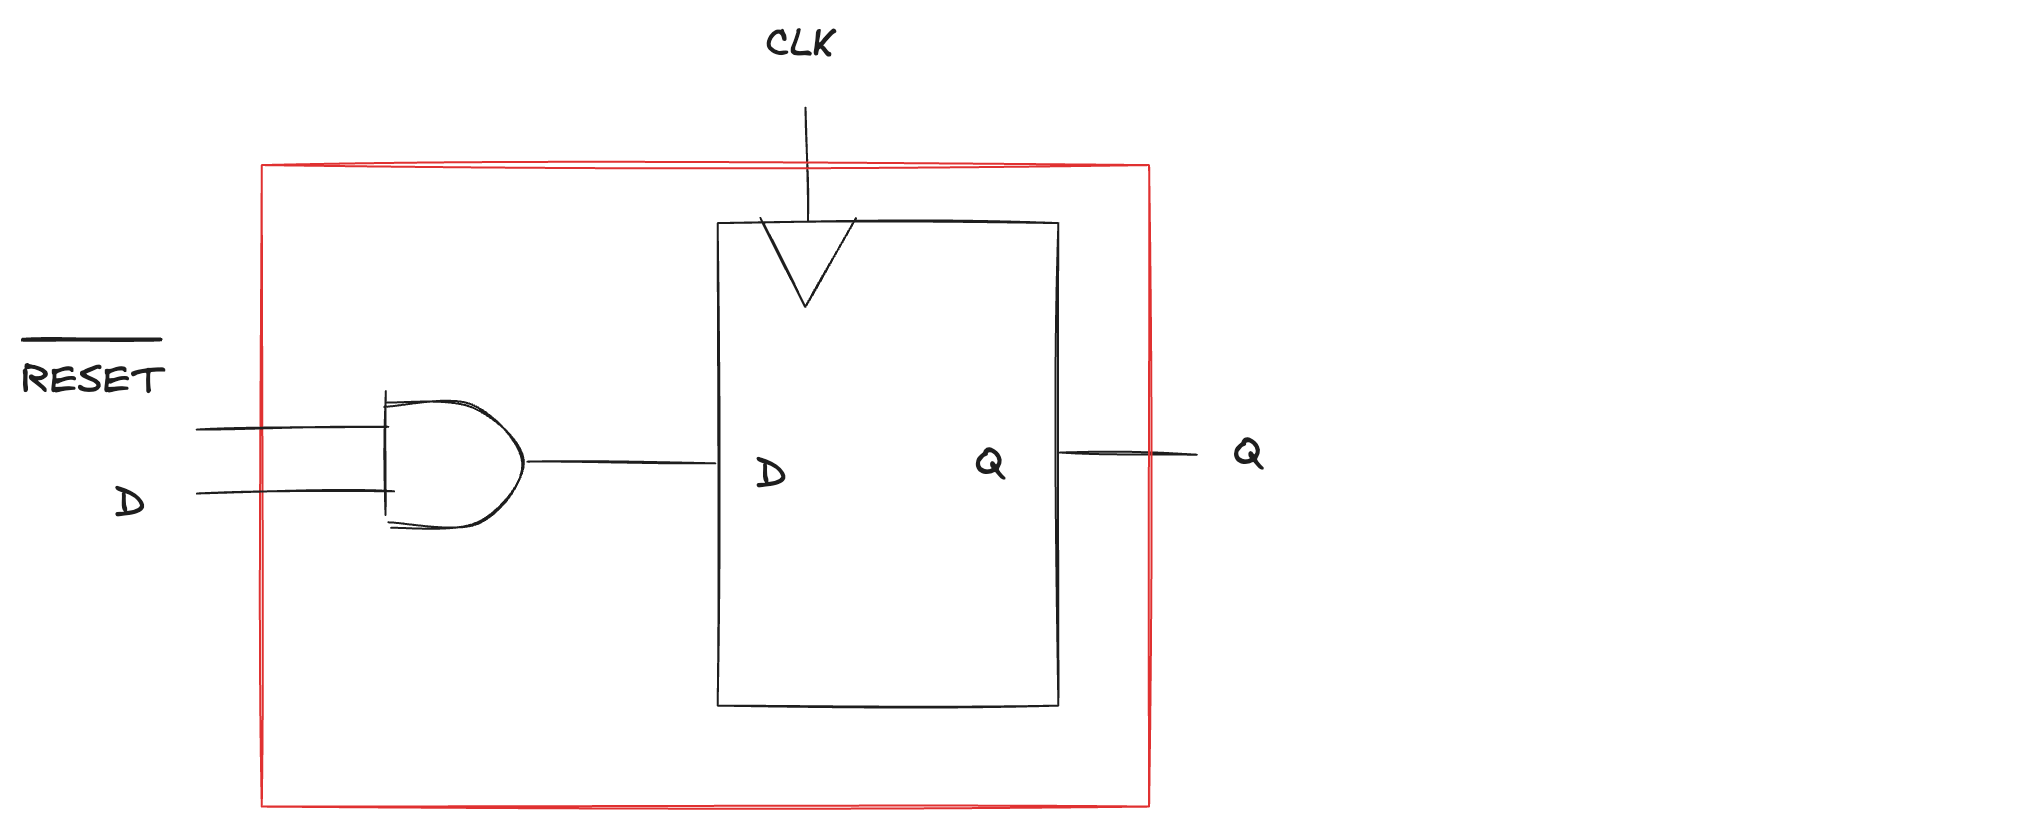

To implement this idea, we can begin with a standard D flip-flop and simply AND the data input with the Reset signal. Because the Reset in this example is **active low**, it performs its reset function when it is 0. When Reset is high (inactive), the AND gate passes the original D input unchanged, and the flip-flop behaves normally. But when Reset is pulled low, the AND gate outputs a forced 0 regardless of the value of D, ensuring that the flip-flop will load a zero at the next clock edge. The choice of an active-low reset is purely a design convention. If preferred, we could just as easily add an inverter and create an **active-high** reset. What matters is that the designer and the system agree on the polarity and use it consistently.

This type of flip-flop is particularly useful at system start-up. By asserting Reset for a short time, we can guarantee that every sequential element begins in a clean and predictable state. Complex digital systems (CPUs, controllers, memory interfaces)universally rely on this mechanism to **avoid undefined behaviour on power-up**. We can describe the behaviour of a resettable D flip-flop in VHDL as follows:

In [ ]:
entity DFF_reset_low is
    port(CLK   : in  std_logic;
         RESET : in  std_logic;   -- active low
         D     : in  std_logic;
         Q     : out std_logic
    );
end entity DFF_reset_low;

In [ ]:
architecture rtl of DFF_reset_low is
    signal D_int : std_logic;
begin
    -- Active-low reset implemented via AND gate
    D_int <= D and RESET;

    process(CLK)
    begin
        if rising_edge(CLK) then
            Q <= D_int;
        end if;
    end process;

end architecture rtl;

## Transistor level implementation

Considering the D Flip-Flop impplementation using logic gate, we can try to estimate the number of transistors required for its construction, recalling the transistor implementation of the basic logic gates.

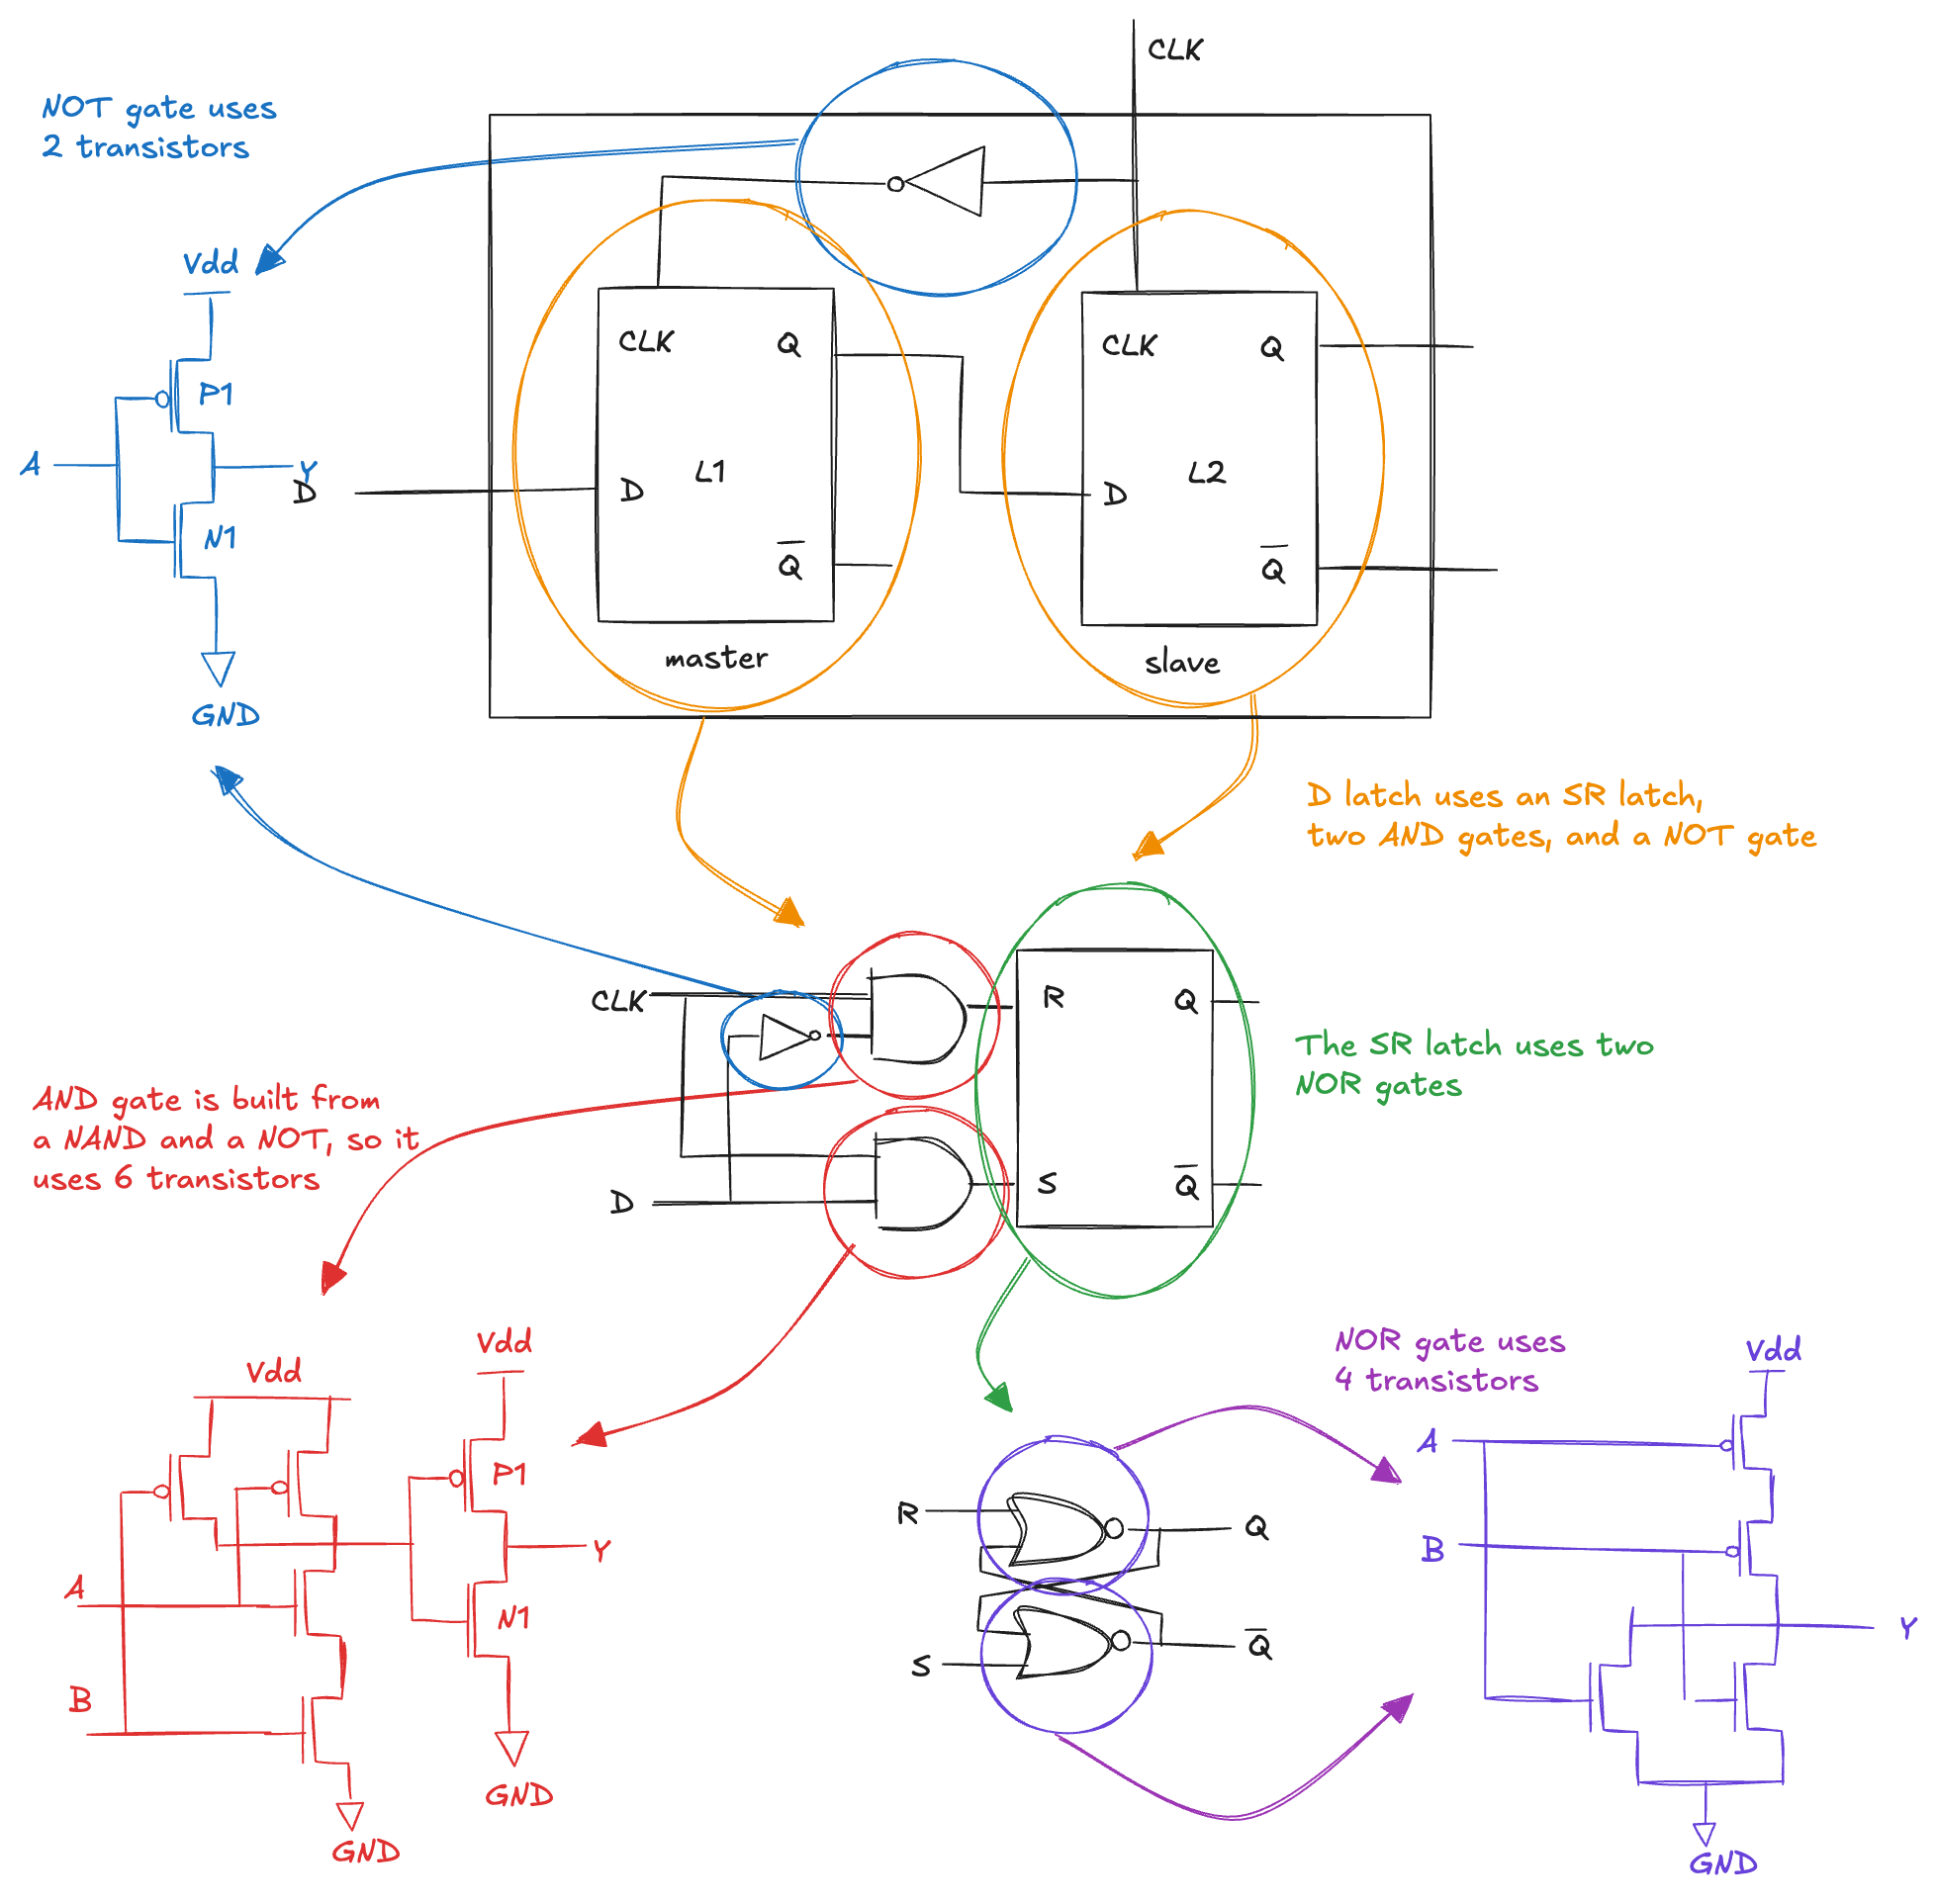

The D flip-flop can be decomposed into two D latches arranged in a master–slave configuration, together with an inverter that generates the complementary clock. Each D latch consists of an SR latch, two AND gates, and a NOT gate. The SR latch itself is built from two NOR gates, each implemented with four transistors, giving eight transistors in total. Each AND gate is realised by combining a NAND gate and an inverter, requiring six transistors per AND gate, for a total of twelve. The NOT gate contributes two more. A single D latch therefore uses twenty-two transistors. Since the flip-flop contains two such latches, the pair contributes forty-four transistors, and the additional clock inverter adds two more. Altogether, the complete D flip-flop uses **46 transistors**.

This number is extremely high and the flip-flop can be considered a b**asic building block**, so it is needed to find more efficient implementations, **going beyond the digital abstraciton** and exploiting the electrical characteristics of transistors to reduce the overall count.

Looking at the full CMOS implementation of a D flip-flop, it becomes clear that a conventional gate-level design requires many transistors. Yet the essential behaviour of a latch is conceptually quite simple: it needs to be **transparent** when the clock allows data to flow in, and **opaque** the rest of the time, so that the stored value is preserved. In spirit, it behaves like a controlled switch. This observation leads naturally to a **much more compact transistor-level design**. Instead of constructing the latch from NOR gates, AND gates, and inverters, we can build a minimal D latch using a **single transmission gate**:

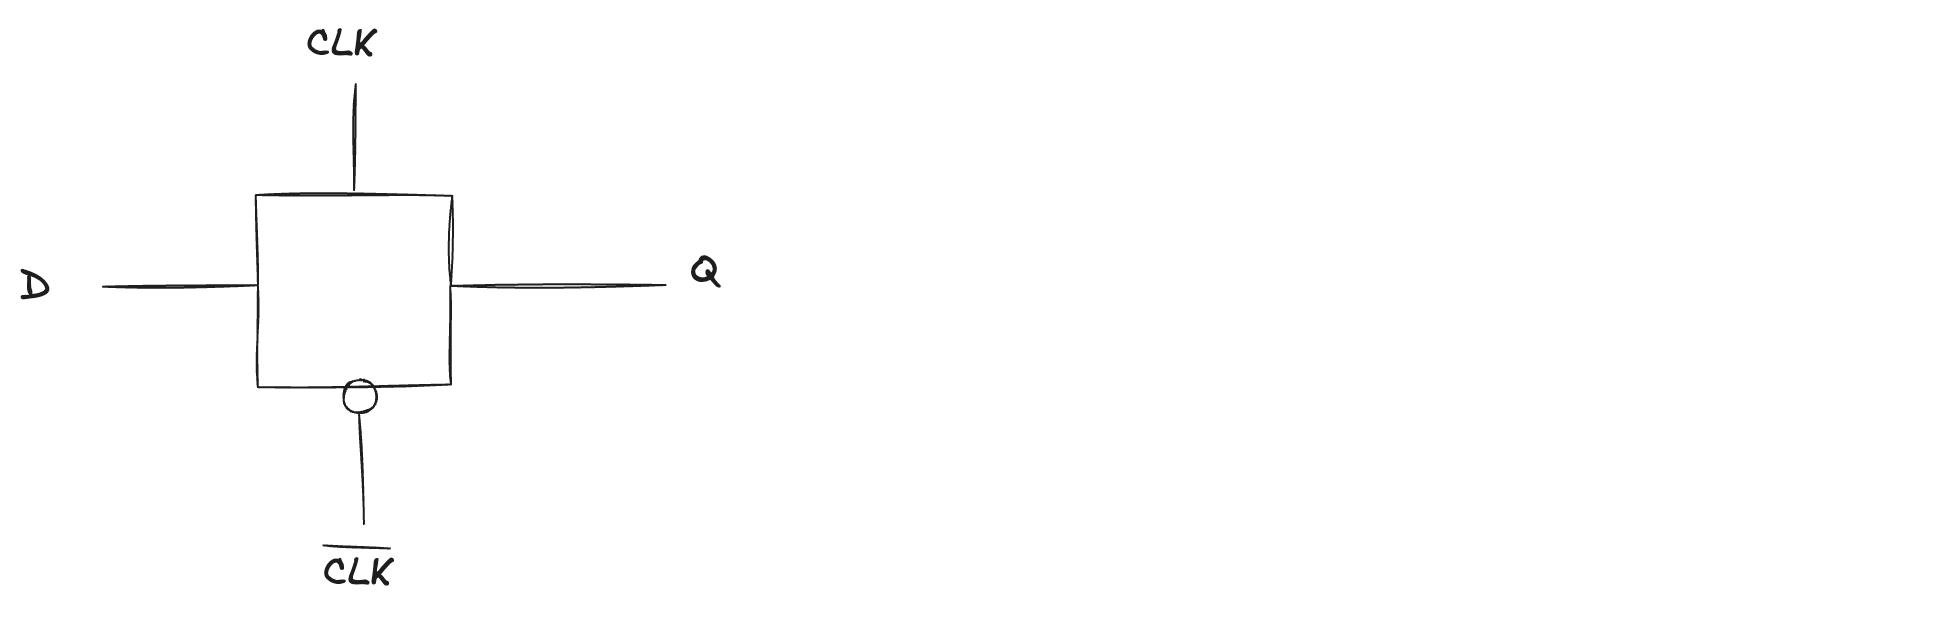

It is essentially a bidirectional switch implemented with one nMOS and one pMOS transistor in parallel, controlled by complementary clock signals. When the clock is high, the switch is on, allowing the input D to pass directly to the internal storage node Q, making the latch transparent. When the clock is low, the switch turns off, isolating Q from D and leaving the latch opaque. Although elegant and efficient, this minimal design suffers from two important limitations. The first is the presence of a **floating node**. When the transmission gate is off, the internal storage node is not actively driven by any gate; it merely holds whatever charge was left on its capacitance. Over time, leakage currents and noise can disturb this charge, gradually corrupting the stored value. In a practical system, this makes the latch unreliable unless it is frequently refreshed. The second limitation is the lack of any **buffering** around the storage node. Without buffers, the input and the internal node are directly connected (when transparent), and noise can easily force the transistors into conduction even when the clock says they should be off. A small negative glitch on D, for example, can accidentally turn on the nMOS device, briefly making the latch transparent even though the clock is low. Similarly, a voltage spike above VDD can activate the pMOS device. Because of this sensitivity, neither the internal state node nor the transmission-gate input should ever be exposed to external circuitry where uncontrolled noise might appear.

These issues explain why real digital systems almost never use this ultra-compact transmission-gate latch on its own. Instead, practical latches and flip-flops add buffers, feedback, and well-controlled gating logic to ensure that the stored value remains stable and immune to noise, even in the presence of long clock intervals or electrical disturbances. The transmission-gate concept remains useful, but only as one component inside a more robust sequential element.


A real implementation of a reliable D latch that overcomes these limitations combines the transmission gate with a pair of inverters connected in a feedback loop:

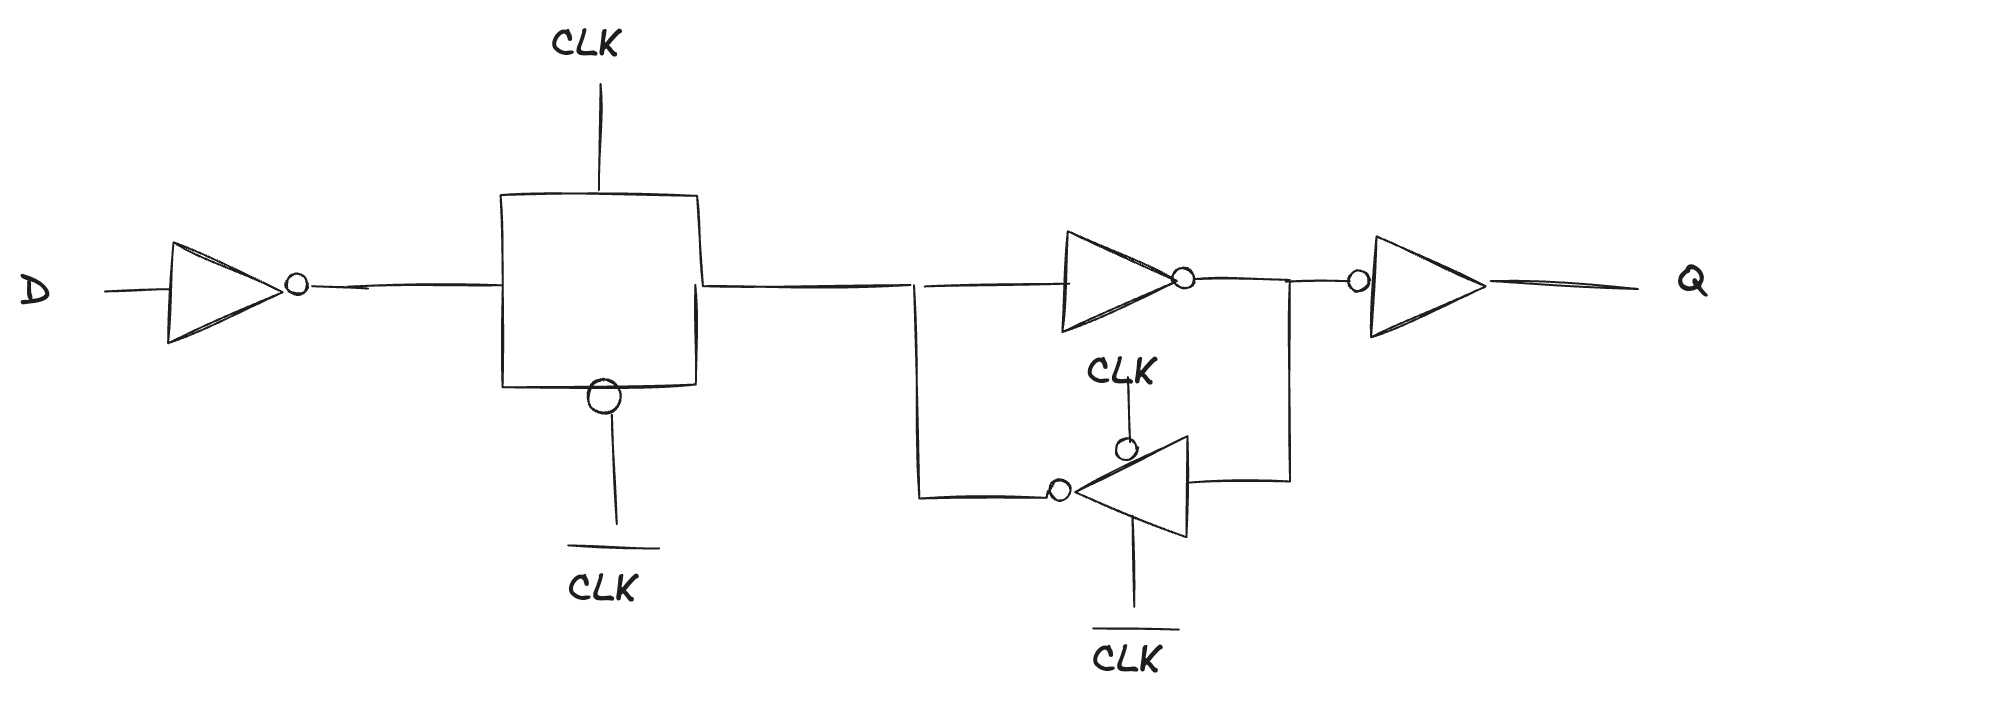

Although the internal details of this optimized latch involve subtle transistor-level techniques that fall outside the scope of an introductory course, the essential idea is straightforward: the transmission gate performs the switching action, while the inverters ensure that the stored value is actively driven and protected from leakage or floating-node disturbances. The latch therefore remains compact without sacrificing reliability.

When we place two of these improved D latches in the familiar master–slave arrangement and include the small amount of additional gating needed to generate the complementary clock, the complete D flip-flop ends up requiring only **twenty transistors**:

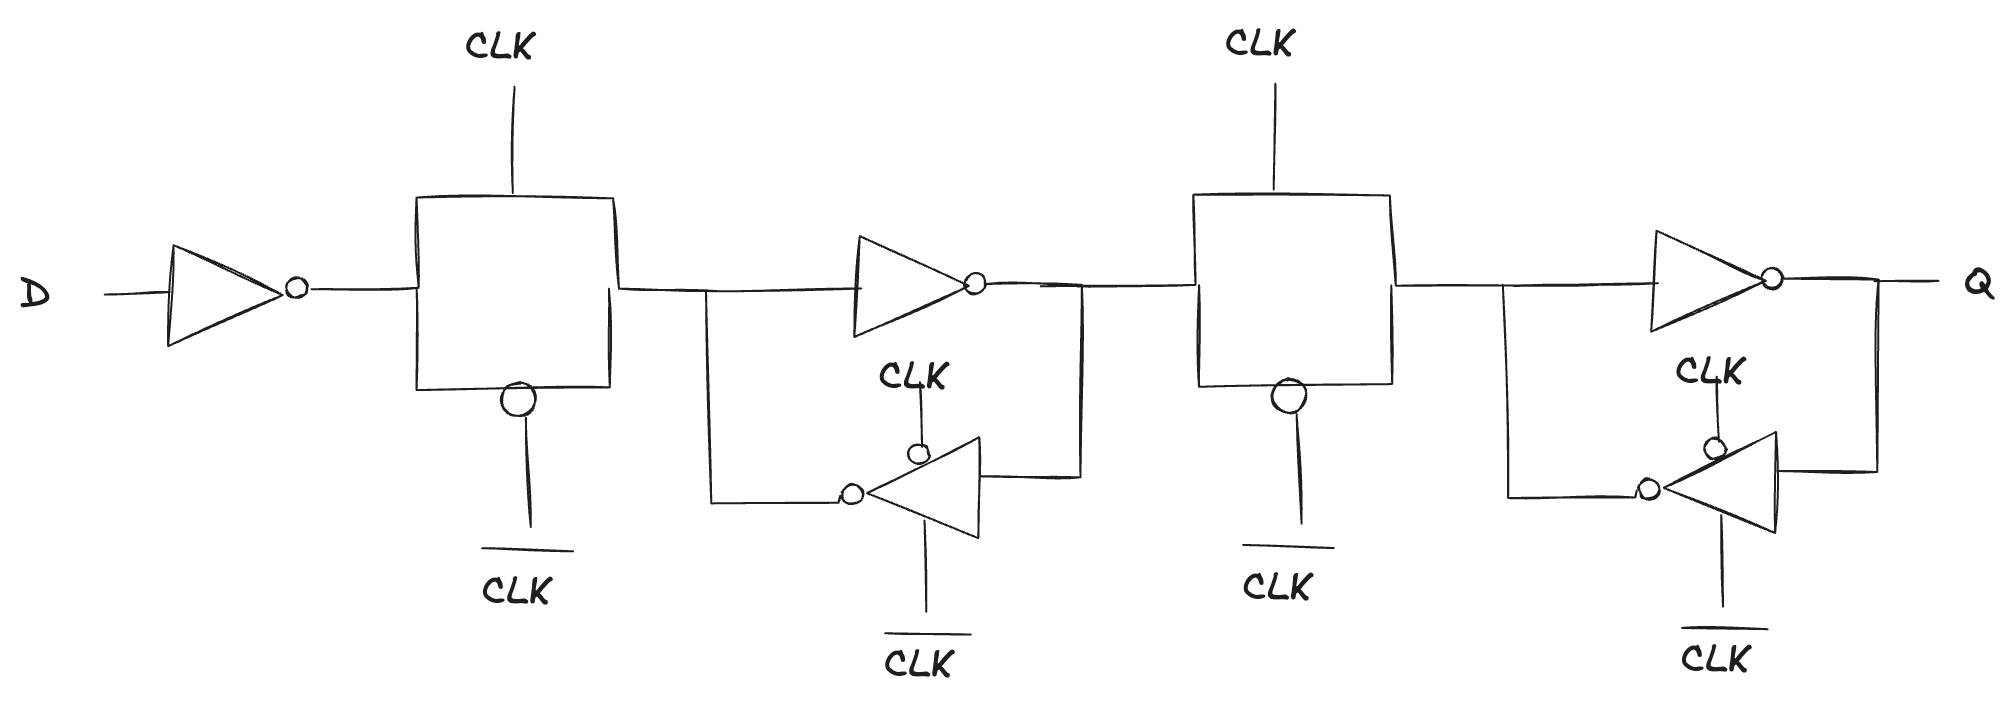

This is a dramatic reduction compared to the forty-six transistors needed when the flip-flop is built from logic gates alone. It also illustrates how transistor-level circuit design can achieve significant efficiency improvements beyond what is visible in gate-level diagrams.

In short, commercial flip-flops rely on clever transistor-level constructions that are far more compact than their gate-based counterparts, reducing area, power, and delay—while preserving the essential behaviour of a D flip-flop used throughout synchronous digital systems.

## Problematic sequential circuits

While the disciplined use of synchronous sequential circuits greatly simplifies design and analysis, certain configurations can still lead to unexpected or undesirable behaviour. Two common problematic


### Astable circuits

A particularly interesting behaviour emerges when we connect an odd number of inverters in a loop: 

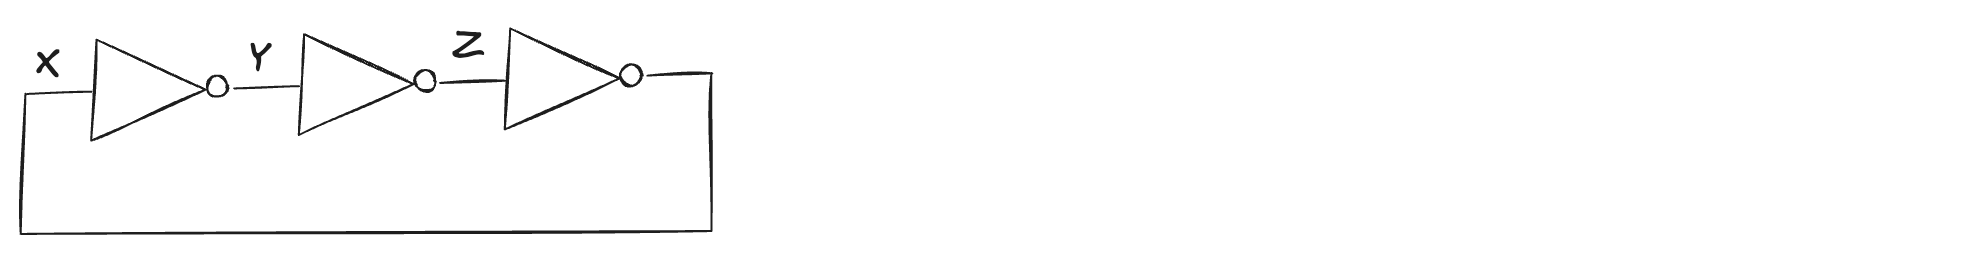

At first glance, the circuit seems trivial: each inverter simply produces the complement of its input. But once placed in a ring, the three inverters begin to interact in a way that prevents the system from ever reaching a consistent, stable configuration. If we assume that the first node, X, starts at zero, the next inverter immediately forces Y to one, the third sets Z to zero, and the final inverter loops back to drive X to one, contradicting our initial assumption. No matter which starting value we pick, the logic "chases itself" and overturns the previous value. The circuit therefore has **no stable states**, and is called **astable**.

What actually happens in practice is that the signals begin to oscillate. Each inverter introduces a small propagation delay (e.g. one nanosecond), so a change at X takes time to ripple through Y and Z before coming back to X. If X rises at time zero, Y will fall one nanosecond later, Z will rise at two nanoseconds, and X will fall at three nanoseconds. This falling transition then propagates in the same fashion: Y rises at four nanoseconds, Z falls at five nanoseconds, and X rises again at six nanoseconds. Once the first cycle completes, the pattern simply repeats. 


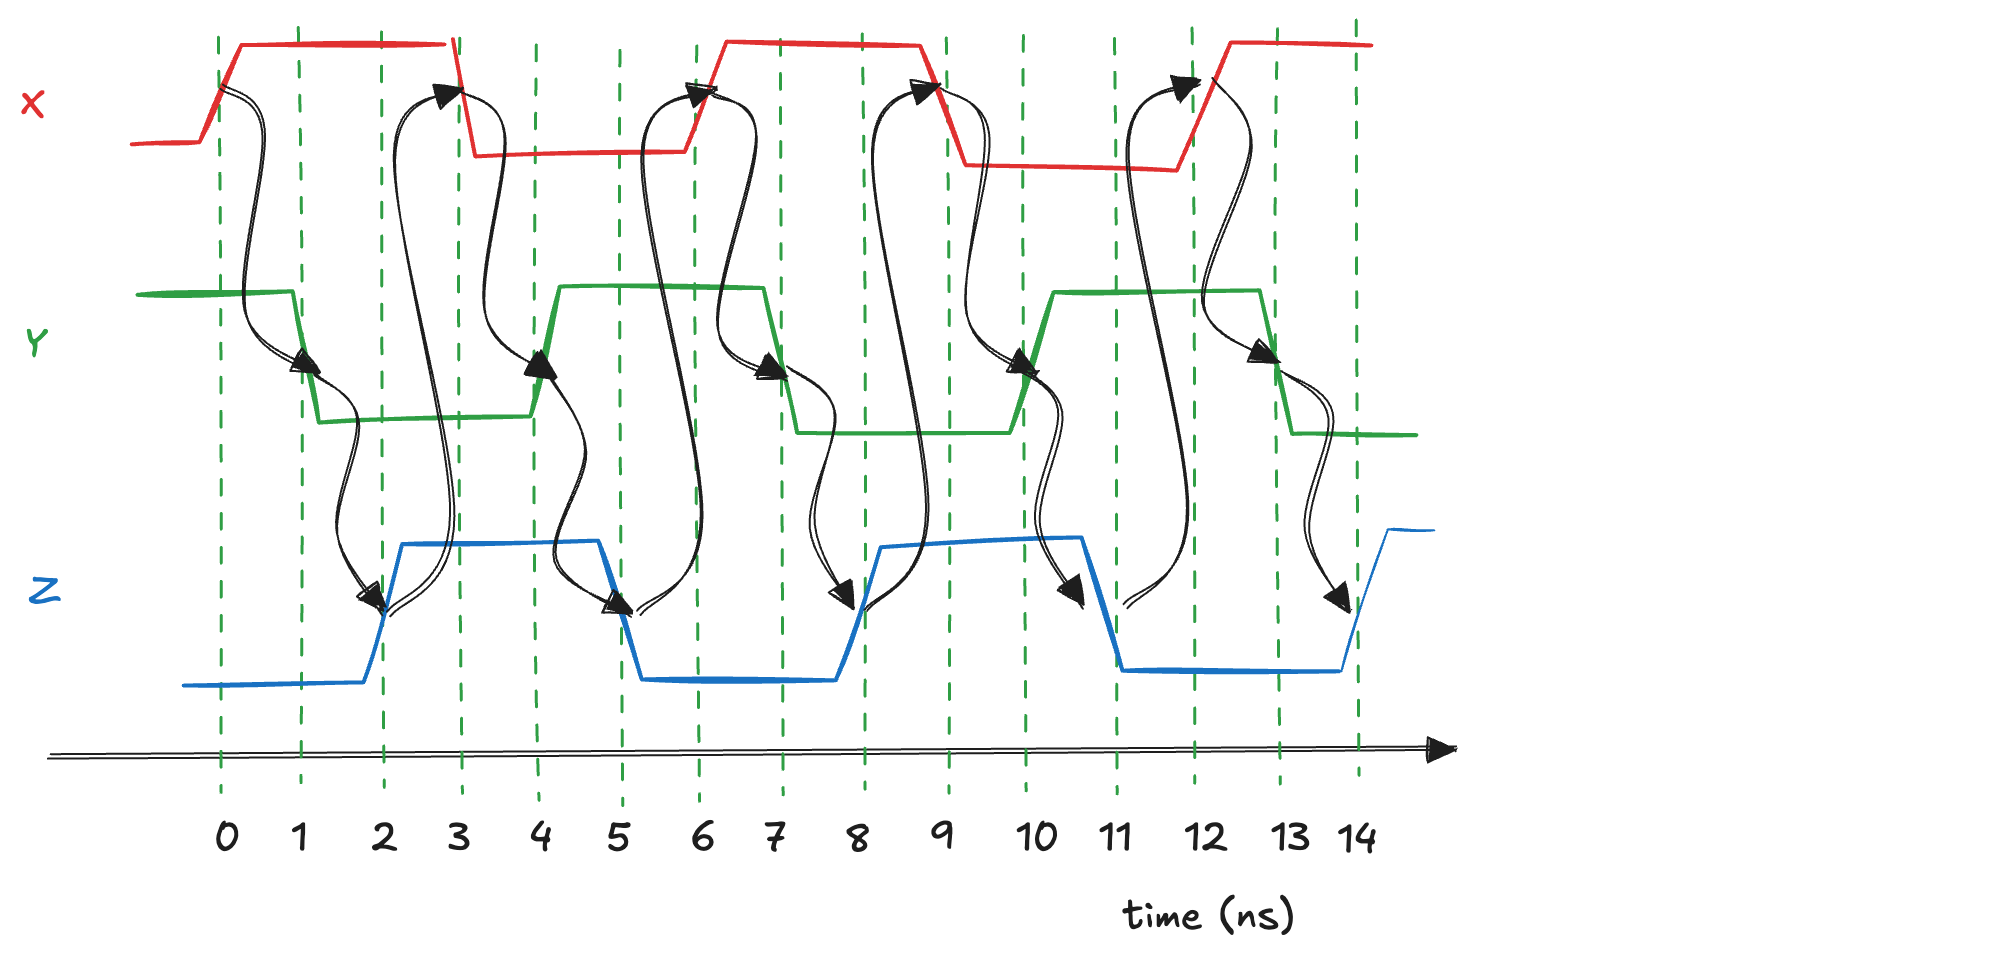

Every node in the loop alternates periodically between zero and one, forming what is known as a **ring oscillator**. In this three-stage example, the period is twice the total delay through the loop, giving a six-nanosecond oscillation.

Although elegant in its simplicity, the behaviour of this oscillator depends entirely on the actual propagation delays of the inverters, which vary with supply voltage, manufacturing conditions, and temperature. Even tiny changes in the physical environment can stretch or shrink the delay of each gate, and therefore alter the oscillation frequency. For this reason, the exact period of a ring oscillator is extremely difficult to predict accurately. Despite this unpredictability, ring oscillators are widely used as clock sources, randomness generators, and test structures, precisely because their behaviour arises from the intrinsic delays of the underlying technology.

### Race conditions

Another important timing hazard in digital systems is the **race condition**. This occurs when the output of a combinational circuit depends not only on the logical values of its inputs, but also on the precise timing of when those inputs change. If two or more input signals change nearly simultaneously, small differences in their arrival times can cause the output to take different paths through the logic, leading to unpredictable or incorrect results. Consider the following example, at first glance, the circuit appears to be a very compact and elegant implementation of a D latch:

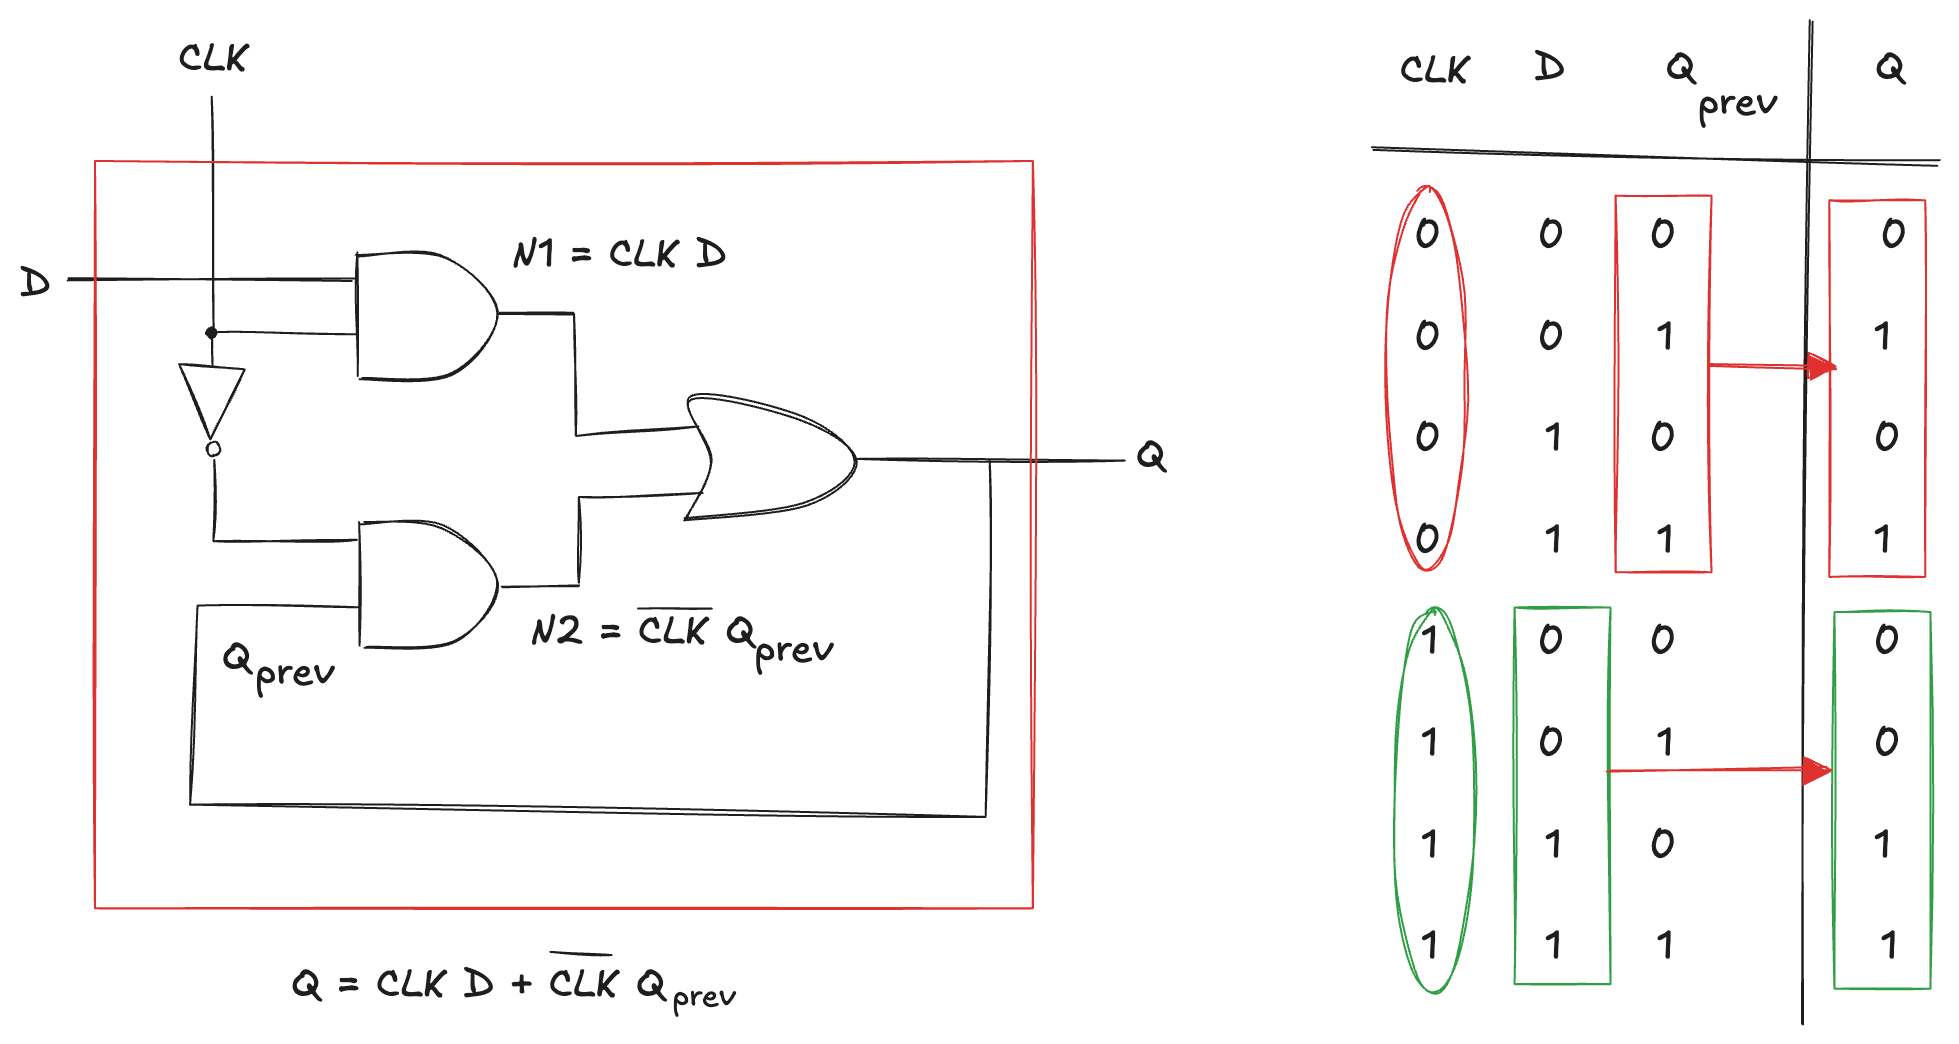

It uses fewer gates than the conventional design, and its logic expression suggests exactly the behaviour we expect: when the clock is high, Q should follow D, and when the clock is low, Q should retain its previous value. The truth table reinforces this impression, matching the intended functionality for all combinations of CLK, D, and the previously stored output. However, the apparent simplicity hides a subtle and dangerous problem: the circuit contains a **race condition** that makes its behaviour unreliable when different gates experience different propagation delays:

- the inverter in the CLK path delays the transition to the lower AND gate,
- when the clock switches from 1 to 0, both AND momentarily become 0
- this creates a temporary drop of Q, which can propagate into the feedback and lock the latch into 0 permanently, or create glitches.

To see it we can simulate the circuit in DEES:

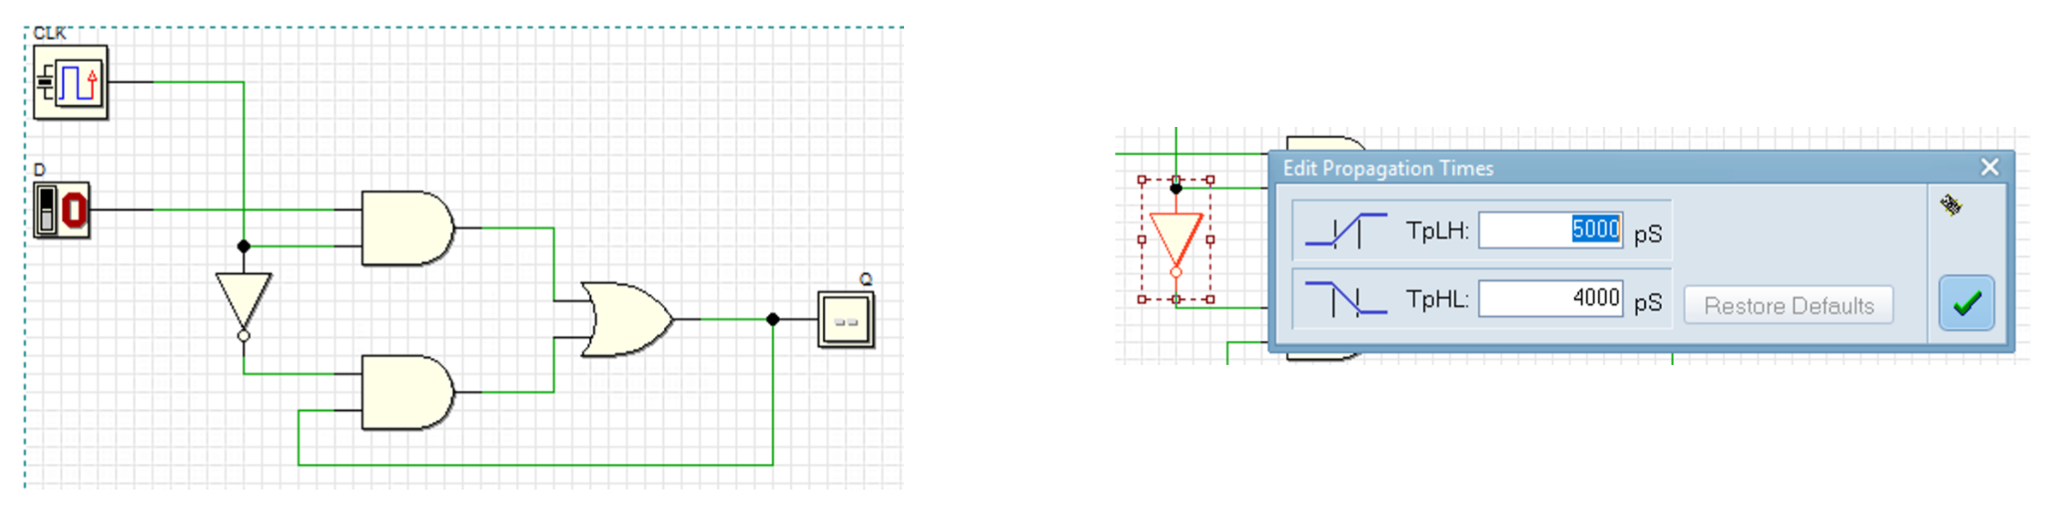


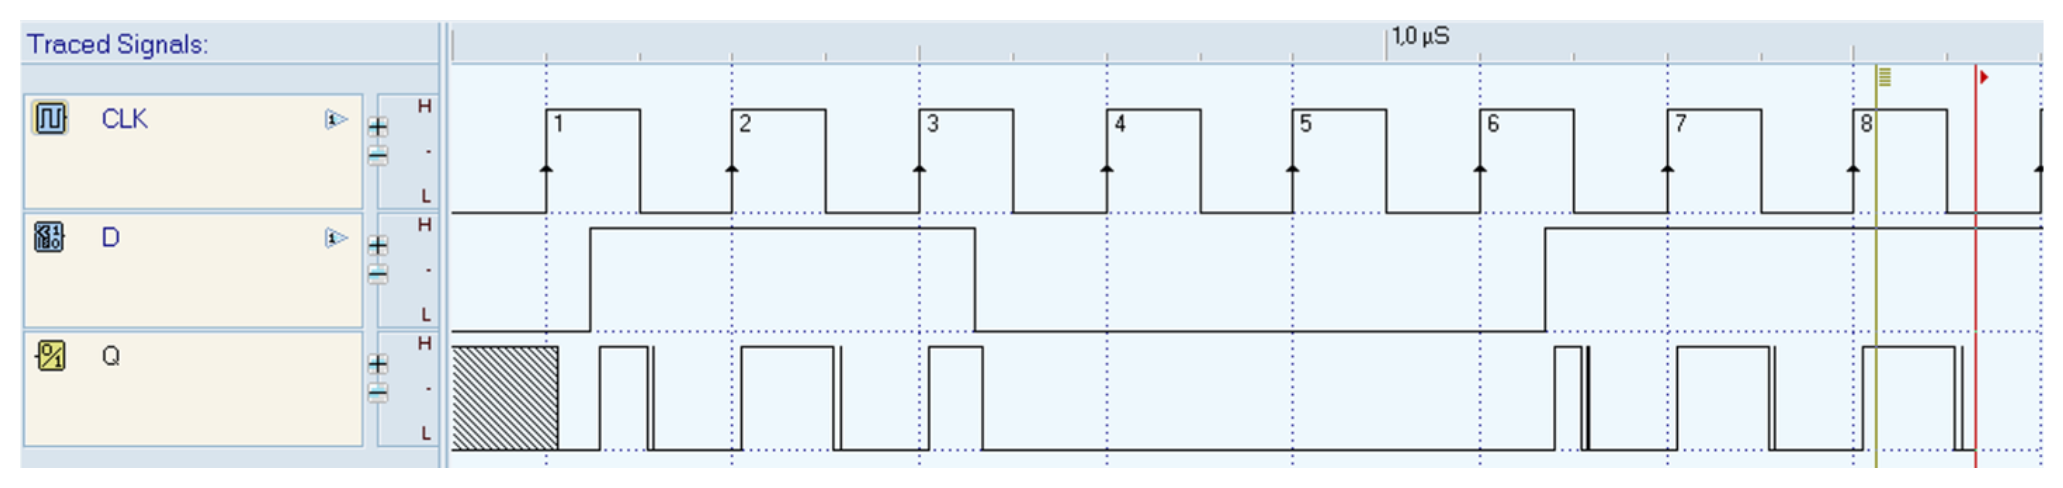

This behaviour is the hallmark of a race condition: **two signals that must arrive in a precise temporal order instead arrive out of sequence, allowing a transient glitch to determine the long-term state of the circuit**. Such timing hazards are intolerable. They make the circuit sensitive to minute variations in temperature, voltage, or manufacturing, and therefore fundamentally unreliable.

### Asynchronous circuits

The sequential circuits we have examined so far share an important structural feature: they contain loops, or **cyclic paths**, in which the output of a logic gate is fed back (directly or indirectly) to its own input. Such feedback is **essential for building memory elements**, but it also introduces behaviour that depends sensitively on the precise timing of signals as they propagate through the gates. In a purely **asynchronous circuit**, the final outcome is determined by whichever path happens to respond first. If one gate switches slightly faster than the others, the circuit may settle into one behaviour; if another path happens to be faster (perhaps because of manufacturing variation, supply voltage fluctuations, or even temperature changes) the circuit may settle differently. A design that "works" on the designer’s desk may fail in another batch of chips, or at a different temperature, or under a different supply voltage. These **failures are notoriously difficult to diagnose**, because the circuit does not violate any logical rule: it is simply relying on unpredictable analog timing effects.

## Synchronous digital design

To avoid the fragility of sequential circuits, modern digital design follows a **disciplined approach**: we **break the cyclic paths by inserting registers**, creating a system that alternates cleanly between combinational logic and well-defined storage elements. Each register holds the system’s state, and that state is updated only on the active edge of the clock. Once a value has been captured, it does not change until the next clock event, no matter how long or short the delays inside the combinational logic might be.

This transformation has a **profound stabilising effect**. Because the system only observes changes at clock edges, the detailed **ordering of internal transitions no longer matters**. As long as **the clock is slow enough to allow all combinational paths to settle before the next edge arrives**, every register in the system captures correct and consistent values. Races that previously depended on microscopic delay differences disappear, replaced by a predictable, repeatable behaviour driven by a single global timing reference.

This is the essence of **synchronous digital design**: by structuring a circuit as a sequence of combinational logic blocks separated by registers, we eliminate the chaotic and hard-to-debug behaviour inherent to asynchronous circuits, and replace it with a system whose behaviour is both dependable and scalable.

A synchronous sequential circuit is distinguished by **the presence of a clock input**, a signal whose rising edges define specific **instants at which the circuit is permitted to change its internal state**. Instead of reacting immediately to every change in its inputs, a synchronous system updates its state in a disciplined and predictable rhythm. The notions of current state and next state capture this behaviour: the current state describes the values stored in the circuit’s registers at the present moment, while the next state is the set of values that will replace them at the next rising edge of the clock.

This structure leads to a set of powerful design rules. In a synchronous circuit, every element must be either **a combinational block**, which performs pure logic without memory, or **a register**, which holds part of the system’s state. Crucially, there must be at least one register in any feedback loop within the design, ensuring that the circuit cannot respond instantaneously to its own output. All registers receive the same clock signal, so the entire system updates in lockstep. The clock thus acts as a **global coordinator**, slicing time into discrete steps during which combinational logic computes new values and registers simultaneously capture them.

The flip-flop represents the simplest possible synchronous sequential circuit. It has a single data input, a clock input, and one stored output: 

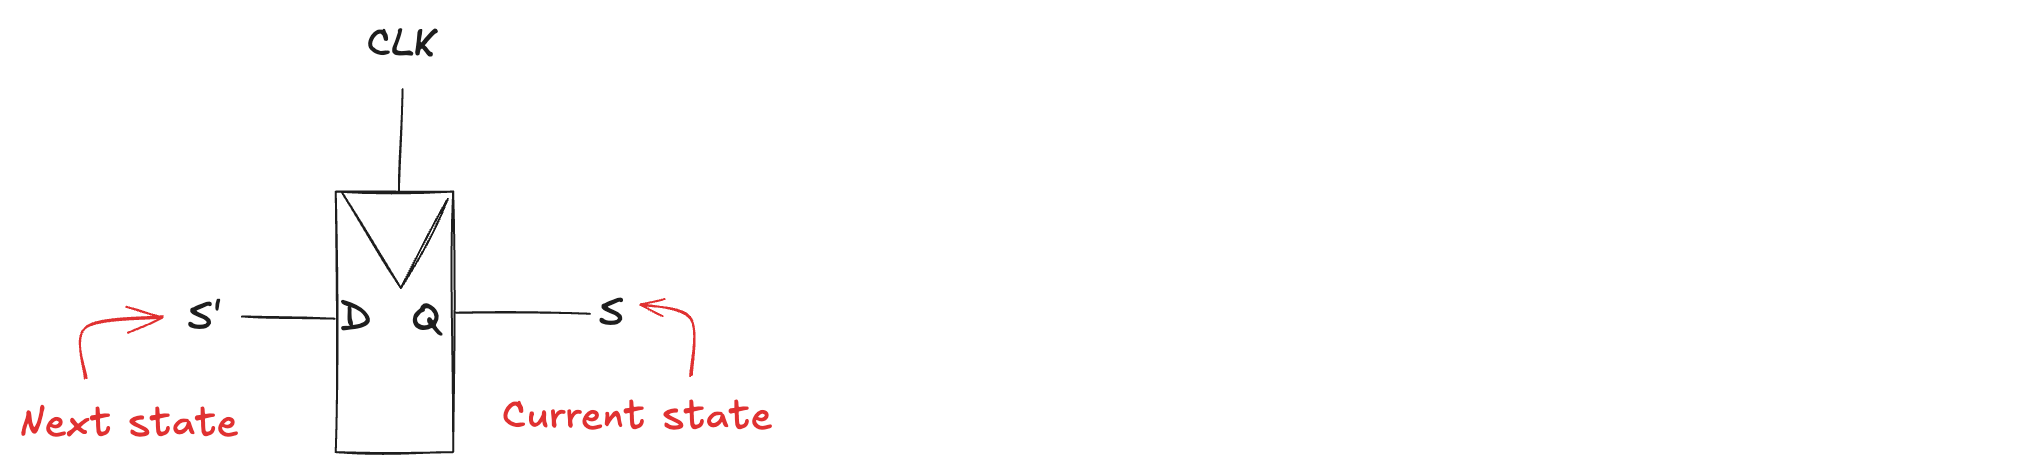

At each rising edge of the clock, the flip-flop samples the value on D and stores it as the new output Q, which becomes the circuit’s current state until the next edge arrives. In this sense, the flip-flop embodies the fundamental synchronous operation: compute a next state and commit to it only at a well-defined moment in time.

This disciplined approach is what makes synchronous circuits predictable, analyzable, and robust. By separating computation from state updates and tying all transitions to the clock, the designer gains control over timing, eliminates races, and ensures that the circuit behaves consistently despite the intrinsic delays of its individual gates.

The following diagram illustrates the **canonical structure** of a synchronous sequential circuit: 

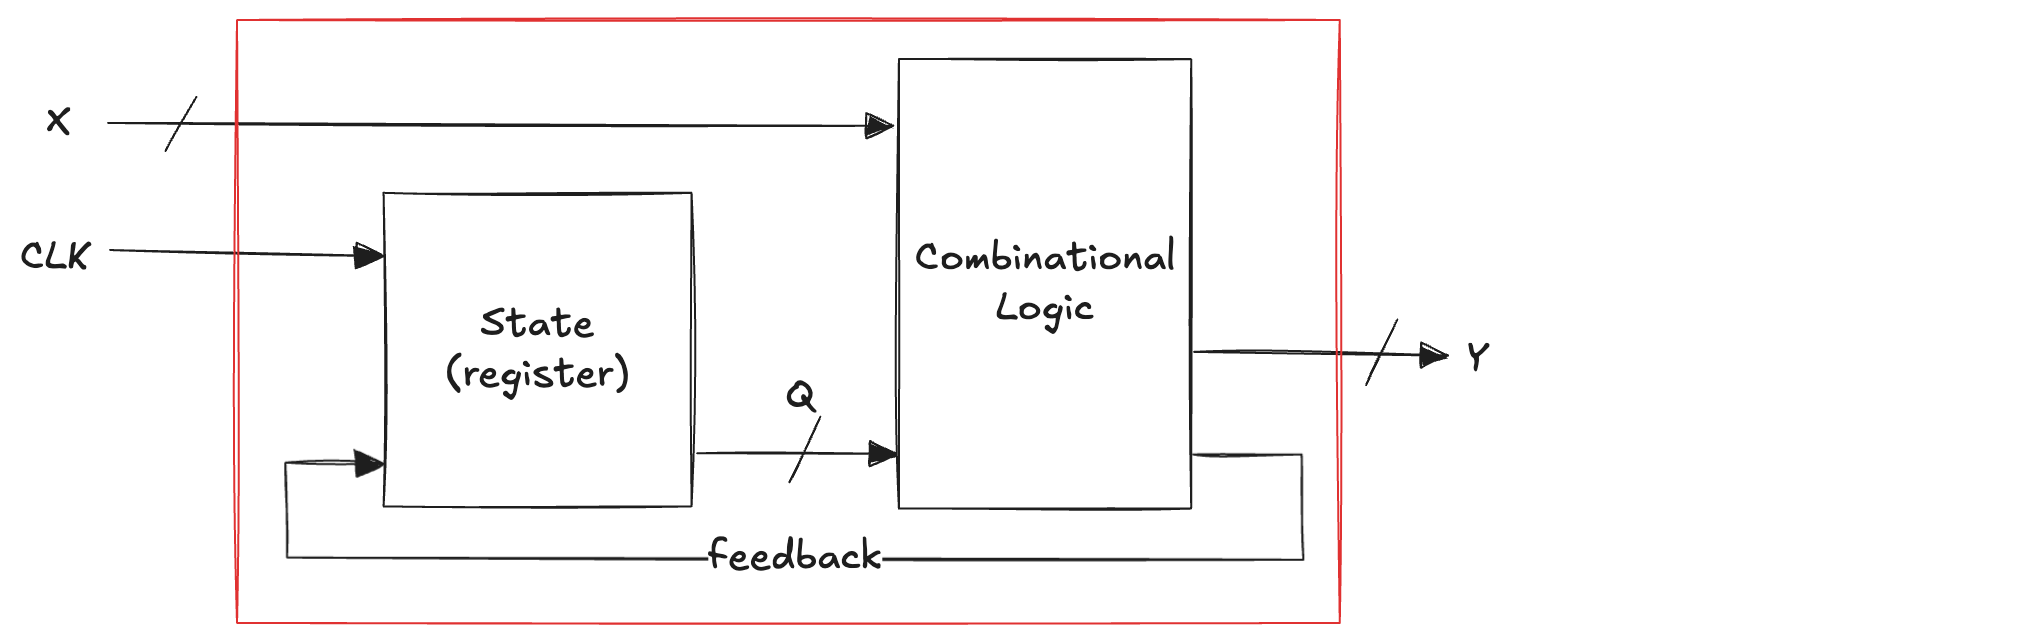

At its core lies a state register, a collection of flip-flops that collectively store the current state of the system. These flip-flops all share the same clock signal, ensuring that the stored state changes only at well-defined instants—the rising edges of the clock.

The behaviour of the circuit between clock edges is governed entirely by the combinational logic. This logic block receives two kinds of inputs: the external input signals and the current state coming from the register. Using these two sources of information, the combinational logic computes both the circuit’s output and the next state, which is the value that will be loaded into the state register at the next clock edge.

Below is a general-purpose VHDL template for implementing the synchronous circuit:


In [ ]:
entity SyncCircuit is
    generic(N : integer := 4   -- number of state bits);
    port(CLK : in  std_logic;
         X   : in  std_logic_vector(N-1 downto 0);  -- external inputs
         Y   : out std_logic_vector(N-1 downto 0)   -- outputs
    );
end SyncCircuit

architecture Behavioral of SyncCircuit is

    -- State register
    signal Q       : std_logic_vector(N-1 downto 0); -- current state
    signal Q_next  : std_logic_vector(N-1 downto 0); -- next state

begin

    -- 1. COMBINATIONAL LOGIC:
    comb_logic : process(X, Q)
    begin
        -- default assignments (mandatory for combinational logic)
        Q_next <= Q;     
        Y      <= (others => '0');

        -- INSERT COMBINATIONAL BEHAVIOR HERE
        --   Q_next <= some_function_of(X, Q);
        --   Y      <= some_other_function_of(X, Q);
    end process;

    -- 2. SEQUENTIAL PROCESS:
    state_register : process(CLK)
    begin
        if rising_edge(CLK) then
            Q <= Q_next;
        end if;\
    end process;

end Behavioral;

Summarizing, a crucial feature of synchronous design is the **feedback path** from the outputs of the combinational logic back to the state register. Although this looks like a cycle, the presence of the register breaks the path in time: the feedback does not take effect immediately, but only after the next clock event. This prevents the kind of uncontrolled oscillations and race conditions seen in asynchronous circuits. The combinational logic sees a stable state while it computes, and the register captures the newly computed values only when the clock permits it. The following examples illustrate how the presence or absence of registers and feedback determines whether a circuit is combinational, sequential, or something invalid from a synchronous-design perspective:

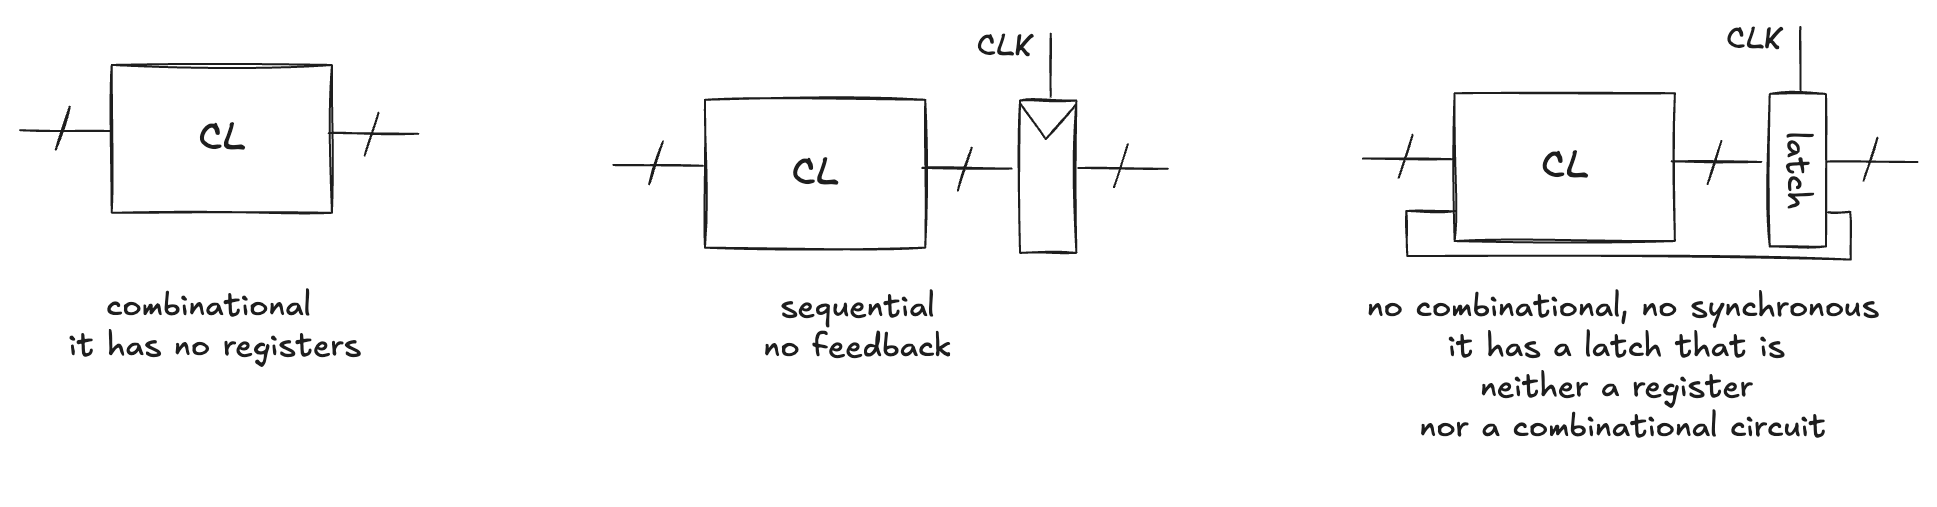

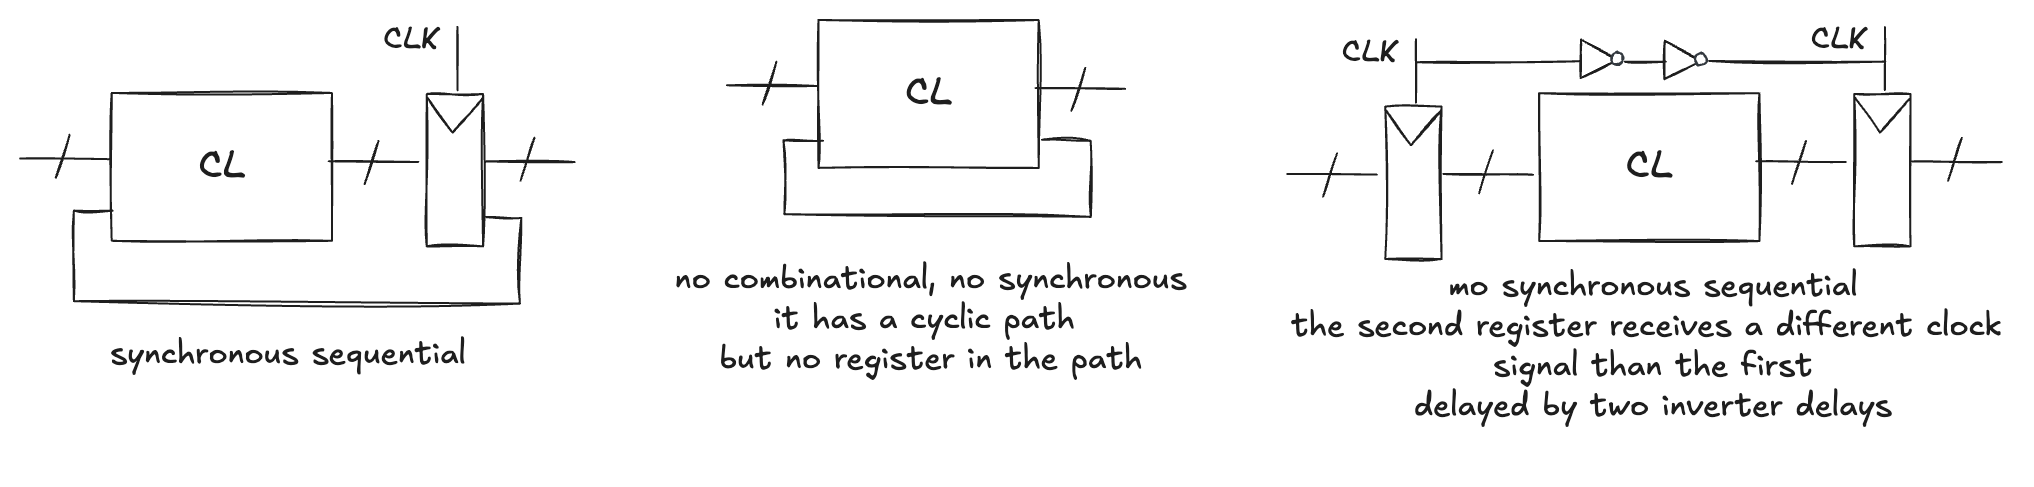

Although **synchronous design dominates modern digital systems**, asynchronous circuits remain an **active and fascinating area of research**. Their defining feature is the absence of a global clock: instead of waiting for periodic timing signals, asynchronous circuits move data forward whenever the necessary conditions are met. This simple conceptual shift of replacing **time-driven control** with **event-driven coordination** opens both significant opportunities and formidable challenges.

From a design perspective, asynchronous circuits promise several appealing advantages. Without a clock that must toggle continuously, they **consume power only when actual computation occurs**, making them inherently attractive for **ultra-low-power** applications. Their **speed is not constrained by a fixed cloc**k period but dictated by the **natural propagation delays** of the circuit’s components. As a result, asynchronous systems can **adapt their performance to environmental conditions**: they speed up at high voltages and low temperatures, and slow down when conditions worsen, all without violating correctness.

Yet designing robust asynchronous circuits is far **more complex** than assembling their synchronous counterparts. The lack of a clock means that correctness depends on subtle timing relationships within the circuit. **Designers must reason about hazards, races, and the precise ordering of signal transitions**. Several design styles attempt to manage this complexity. **Delay-insensitive** approac, for example, use handshake protocols and special encoding schemes to guarantee correctness regardless of individual gate delays. 

In recent decades, research has explored sophisticated asynchronous pipelines, advanced handshake circuits, and new forms of state encoding that reduce ambiguity in signal transitions. Tools, languages and various models have been developed to support asynchronous design flows, though none has reached the industrial maturity of synchronous design tools. Nonetheless, asynchronous circuits have found practical use in niche but important domains: ultra-low-power sensor nodes, cryptographic hardware that resists attacks, energy-harvesting devices, and systems where variations in manufacturing or environment make a fixed clock unreliable.

Research continues to push the boundaries, exploring **hybrid systems** that combine local asynchronous regions within an otherwise synchronous framework, a compromise that captures many benefits of asynchrony while remaining compatible with mainstream tools.